#Netflix Business Case Study

## Given the dataset, let's see the composition of data provided. 
##### (Problem statement)
### Our agenda for working on this dataset would be to get some meaningful insights and help Netflix in understanding the interests of customers from different regions.

All the import statements at one place

In [1]:
import gdown
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#### Downloading and reading the data as csv


In [2]:
gdown.download('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv', 'netflix_case_study_data.csv')
df = pd.read_csv('netflix_case_study_data.csv') # Data is downloaded locally as 'netflix_case_study_data.csv' and read into the dataframe variable 'df'
df.head() # Let's see the first 5 entries on how the data is stored along with some values so that we can work on that data

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
To: /Users/sagarv/Documents/Scaler/Netflix - Data Visualisation Business Case/netflix_case_study_data.csv
100%|██████████████████████████████████████| 3.40M/3.40M [00:00<00:00, 4.31MB/s]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...




---



---



### Let us analyze some basic metrics of the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
# Converting duration column from object type to numeric
df['duration'] = df['duration'].apply(lambda x: float(str(x).split(' ')[0]))
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2.0,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1.0,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1.0,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2.0,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158.0,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2.0,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88.0,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88.0,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [5]:
df.shape

(8807, 12)



---



---



---



Distribution on type of releases

In [6]:
df['type'].value_counts(normalize = True)

Movie      0.696151
TV Show    0.303849
Name: type, dtype: float64

Rating distribution on type of release

In [7]:
df.groupby(['type'])['rating'].value_counts()

type     rating  
Movie    TV-MA       2062
         TV-14       1427
         R            797
         TV-PG        540
         PG-13        490
         PG           287
         TV-Y7        139
         TV-Y         131
         TV-G         126
         NR            75
         G             41
         TV-Y7-FV       5
         NC-17          3
         UR             3
         66 min         1
         74 min         1
         84 min         1
TV Show  TV-MA       1145
         TV-14        733
         TV-PG        323
         TV-Y7        195
         TV-Y         176
         TV-G          94
         NR             5
         R              2
         TV-Y7-FV       1
Name: rating, dtype: int64

In [8]:
# Unique ratings available
df['rating'].dropna().unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', 'UR'], dtype=object)

In [9]:
# Average run time on the show based on type
'''
Movie => avgRuntime is measured in mins
TV Show => avgRuntime is measured in seasons
'''
df.groupby('type')['duration'].mean()

type
Movie      99.577187
TV Show     1.764948
Name: duration, dtype: float64

In [10]:
# Converting date added to datetime 
df['date_added'] = pd.to_datetime(df['date_added'])
df['month_added'] = df['date_added'].dt.month
df['month_added'].fillna(df.groupby('type')['month_added'].transform('mean'), inplace = True)
df['month_added'] = df['month_added'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   float64       
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  month_added   8807 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 894.6+ KB


In [11]:
# There seems to be null values within the column. I would fill them with average duration based on the type of show it is.
df.replace('nan', np.NaN, inplace = True)
df['duration'].fillna(df.groupby('type')['duration'].transform('mean'), inplace = True)
df['duration'] = df['duration'].astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8807 non-null   int64         
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  month_added   8807 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 894.6+ KB


In [13]:
df.groupby('type').describe()

release_year                                                         \
               count         mean       std     min     25%     50%     75%   
type                                                                          
Movie         6131.0  2013.121514  9.678169  1942.0  2012.0  2016.0  2018.0   
TV Show       2676.0  2016.605755  5.740138  1925.0  2016.0  2018.0  2020.0   

                duration             ...               month_added            \
            max    count       mean  ...    75%    max       count      mean   
type                                 ...                                       
Movie    2021.0   6131.0  99.576904  ...  114.0  312.0      6131.0  6.608057   
TV Show  2021.0   2676.0   1.764948  ...    2.0   17.0      2676.0  6.760090   

                                              
              std  min  25%  50%   75%   max  
type                                          
Movie    3.452525  1.0  4.0  7.0  10.0  12.0  
TV Show  3.391687  1.0  4.0  7.0  10.0  12.0  

[2 rows x 24 columns]

In [14]:
df.groupby('month_added').describe()

release_year                                                  \
                   count         mean        std     min     25%     50%   
month_added                                                                
1                  738.0  2012.448509   9.069500  1967.0  2009.0  2016.0   
2                  563.0  2015.996448   6.124740  1945.0  2015.0  2017.0   
3                  742.0  2014.256065  10.855159  1942.0  2014.0  2017.0   
4                  764.0  2014.965969   6.881997  1964.0  2014.0  2017.0   
5                  632.0  2015.594937   6.801965  1973.0  2015.0  2018.0   
6                  738.0  2014.845528   8.833327  1954.0  2015.0  2017.0   
7                  827.0  2014.588875   8.516486  1959.0  2013.0  2017.0   
8                  755.0  2014.148344   8.211187  1976.0  2013.0  2017.0   
9                  770.0  2014.255844   8.176260  1961.0  2013.0  2017.0   
10                 760.0  2013.634211   8.724166  1960.0  2013.0  2016.0   
11                 705.0  2012.490780  11.380817  1954.0  2011.0  2017.0   
12                 813.0  2013.500615   9.486265  1925.0  2013.0  2017.0   

                            duration                                         \
                75%     max    count       mean        std  min   25%   50%   
month_added                                                                   
1            2018.0  2021.0    738.0  74.433604  48.557751  1.0  5.25  91.0   
2            2019.0  2021.0    563.0  66.333925  49.555843  1.0  2.00  86.0   
3            2019.0  2021.0    742.0  71.462264  50.885472  1.0  2.25  90.0   
4            2019.0  2021.0    764.0  73.988220  51.532083  1.0  3.00  91.0   
5            2019.0  2021.0    632.0  68.742089  51.287558  1.0  2.00  87.5   
6            2019.0  2021.0    738.0  66.460705  50.792142  1.0  2.00  87.0   
7            2019.0  2021.0    827.0  68.200726  49.583528  1.0  3.00  88.0   
8            2019.0  2021.0    755.0  69.666225  51.169763  1.0  2.00  89.0   
9            2019.0  2021.0    770.0  68.449351  51.254567  1.0  2.00  90.0   
10           2018.0  2020.0    760.0  71.436842  49.986546  1.0  3.00  88.0   
11           2019.0  2021.0    705.0  71.377305  50.861214  1.0  3.00  89.0   
12           2018.0  2021.0    813.0  67.142681  53.295988  1.0  2.00  85.0   

                           
               75%    max  
month_added                
1            108.0  201.0  
2            103.0  193.0  
3            106.0  187.0  
4            107.0  224.0  
5            103.0  253.0  
6            104.0  273.0  
7            105.5  181.0  
8            105.0  203.0  
9            106.0  229.0  
10           106.0  214.0  
11           109.0  209.0  
12           108.0  312.0



---



---


Unnesting =>

In [15]:
# Generic function to perform split operation on columns that have multiple values stored within the cell
def split_values(df, columnToSplit):
  constraint = df[columnToSplit].apply(lambda x: str(x) .split(', ' )).tolist()
  df_new = pd.DataFrame(constraint, index = df['title'])
  df_new = df_new.stack()
  df_new = pd.DataFrame(df_new)
  df_new.reset_index(inplace = True)
  df_new = df_new[['title',0]]
  df_new.columns = ['title', columnToSplit]
  df = df.merge(df_new, left_on = 'title', right_on = 'title')
  df.drop([columnToSplit + '_x'], axis = 1, inplace = True)
  df[columnToSplit] = df[columnToSplit + '_y']
  df.drop([columnToSplit + '_y'], axis = 1, inplace = True)
  return df


In [16]:
dfC = split_values(df, "cast")
cast_listedIn = split_values(dfC, "listed_in")
cast_director = split_values(dfC, "director")
cast_country = split_values(dfC, "country")

In [17]:
cast_director.replace('nan', np.NaN, inplace = True)
cast_director['director'].value_counts()


Steve Brill        2447
Sarah Smith        1936
Steve Carr         1930
Akiva Schaffer     1925
Martin Scorsese    1777
                   ... 
Armando Croda         1
Lindsey Cordero       1
Adam Bolt             1
Ben Patterson         1
Kirsten Johnson       1
Name: director, Length: 4993, dtype: int64

In [18]:
cast_listedIn.groupby(['type', 'listed_in'])['title'].nunique()

type     listed_in                   
Movie    Action & Adventure               859
         Anime Features                    71
         Children & Family Movies         641
         Classic Movies                   116
         Comedies                        1674
         Cult Movies                       71
         Documentaries                    869
         Dramas                          2427
         Faith & Spirituality              65
         Horror Movies                    357
         Independent Movies               756
         International Movies            2752
         LGBTQ Movies                     102
         Movies                            57
         Music & Musicals                 375
         Romantic Movies                  616
         Sci-Fi & Fantasy                 243
         Sports Movies                    219
         Stand-Up Comedy                  343
         Thrillers                        577
TV Show  Anime Series                     

In [19]:
cast_listedIn

,show_id,type,title,director,country,date_added,release_year,rating,duration,description,month_added,cast,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90,"As her father nears the end of his life, filmm...",9,nan,Documentaries
1,s2,TV Show,Blood & Water,NaN,South Africa,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",9,Ama Qamata,International TV Shows
2,s2,TV Show,Blood & Water,NaN,South Africa,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",9,Ama Qamata,TV Dramas
3,s2,TV Show,Blood & Water,NaN,South Africa,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",9,Ama Qamata,TV Mysteries
4,s2,TV Show,Blood & Water,NaN,South Africa,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",9,Ama Qamata,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559785,s8807,Movie,Zubaan,Mozez Singh,India,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,3,Chittaranjan Tripathy,International Movies
1559786,s8807,Movie,Zubaan,Mozez Singh,India,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,3,Chittaranjan Tripathy,Music & Musicals
1559787,s8807,Movie,Zubaan,Mozez Singh,India,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,3,Chittaranjan Tripathy,Dramas
1559788,s8807,Movie,Zubaan,Mozez Singh,India,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,3,Chittaranjan Tripathy,International Movies


In [20]:
print("Shape of DataFrame Cast - Director => ", cast_director.shape)
print("Shape of DataFrame Cast - Listed_in => ", cast_listedIn.shape)

Shape of DataFrame Cast - Director =>  (751264, 13)
Shape of DataFrame Cast - Listed_in =>  (1559790, 13)


In [21]:
import numpy as np
cast_director.replace('nan', np.NaN, inplace = True)
cast_listedIn.replace('nan', np.NaN, inplace = True)

In [22]:
cast_director.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 751264 entries, 0 to 751263
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       751264 non-null  object        
 1   type          751264 non-null  object        
 2   title         751264 non-null  object        
 3   country       697811 non-null  object        
 4   date_added    750571 non-null  datetime64[ns]
 5   release_year  751264 non-null  int64         
 6   rating        750678 non-null  object        
 7   duration      751264 non-null  int64         
 8   listed_in     751264 non-null  object        
 9   description   751264 non-null  object        
 10  month_added   751264 non-null  int64         
 11  cast          750304 non-null  object        
 12  director      525381 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 80.2+ MB


In [23]:
cast_listedIn.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1559790 entries, 0 to 1559789
Data columns (total 13 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   show_id       1559790 non-null  object        
 1   type          1559790 non-null  object        
 2   title         1559790 non-null  object        
 3   director      1023067 non-null  object        
 4   country       1449713 non-null  object        
 5   date_added    1558186 non-null  datetime64[ns]
 6   release_year  1559790 non-null  int64         
 7   rating        1558671 non-null  object        
 8   duration      1559790 non-null  int64         
 9   description   1559790 non-null  object        
 10  month_added   1559790 non-null  int64         
 11  cast          1558286 non-null  object        
 12  listed_in     1559790 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 166.6+ MB




---



---



---



### Data Visualisation

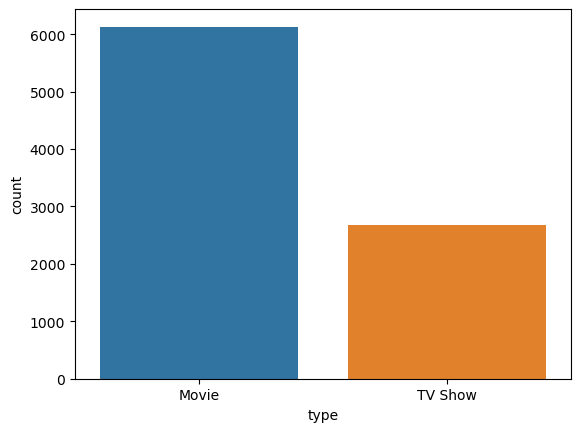

In [24]:
ax = sns.countplot(x = df['type'])

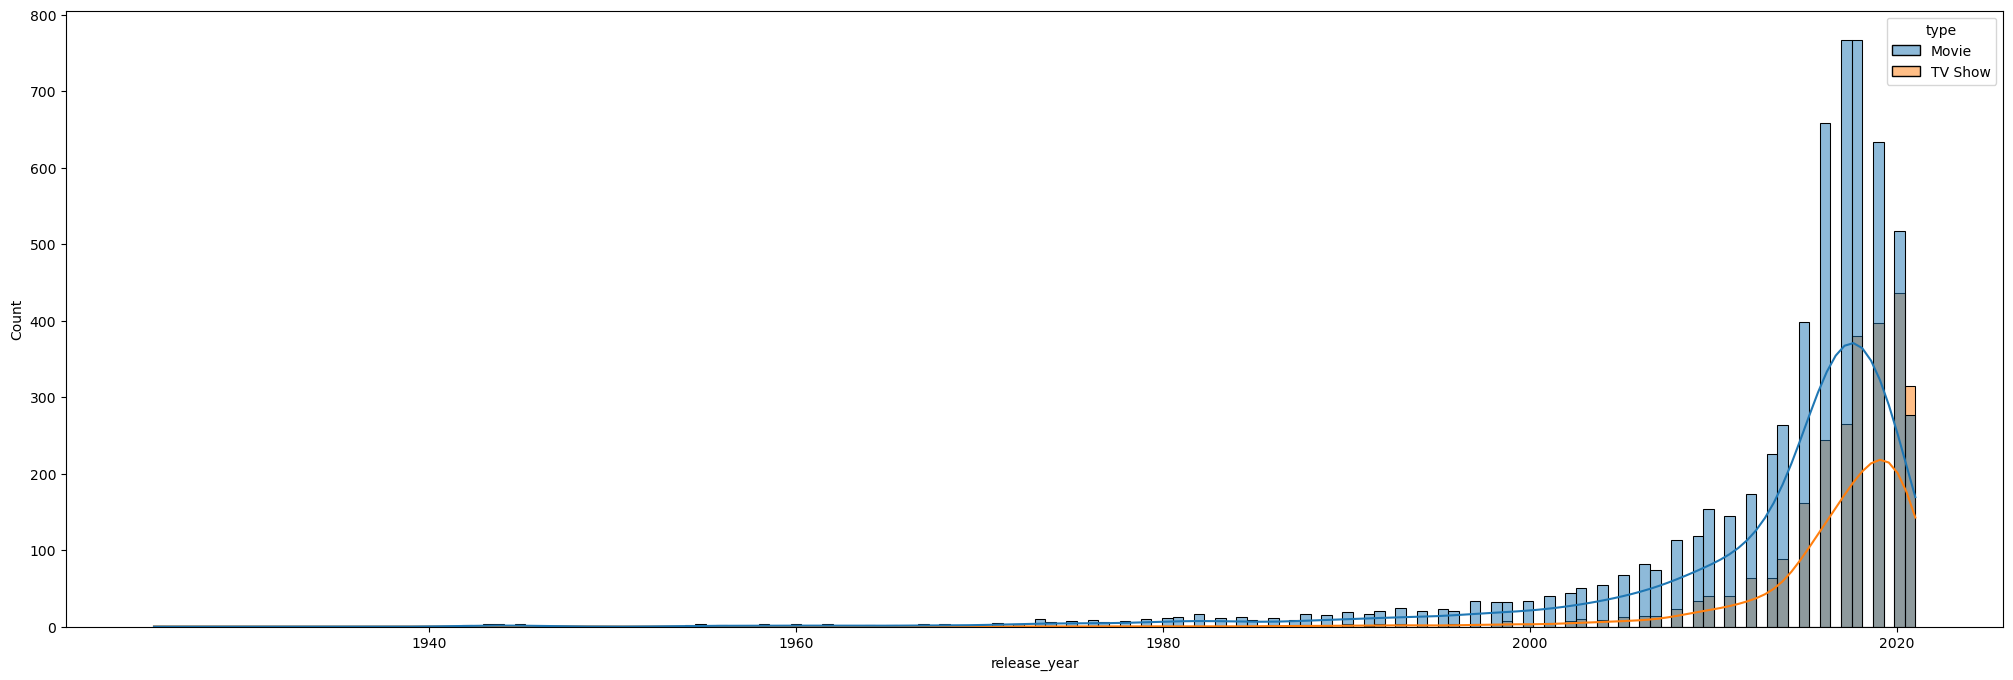

In [25]:
plt.figure(figsize=(25,8))
ax = sns.histplot(data=df, x = "release_year", hue = 'type', kde = True)

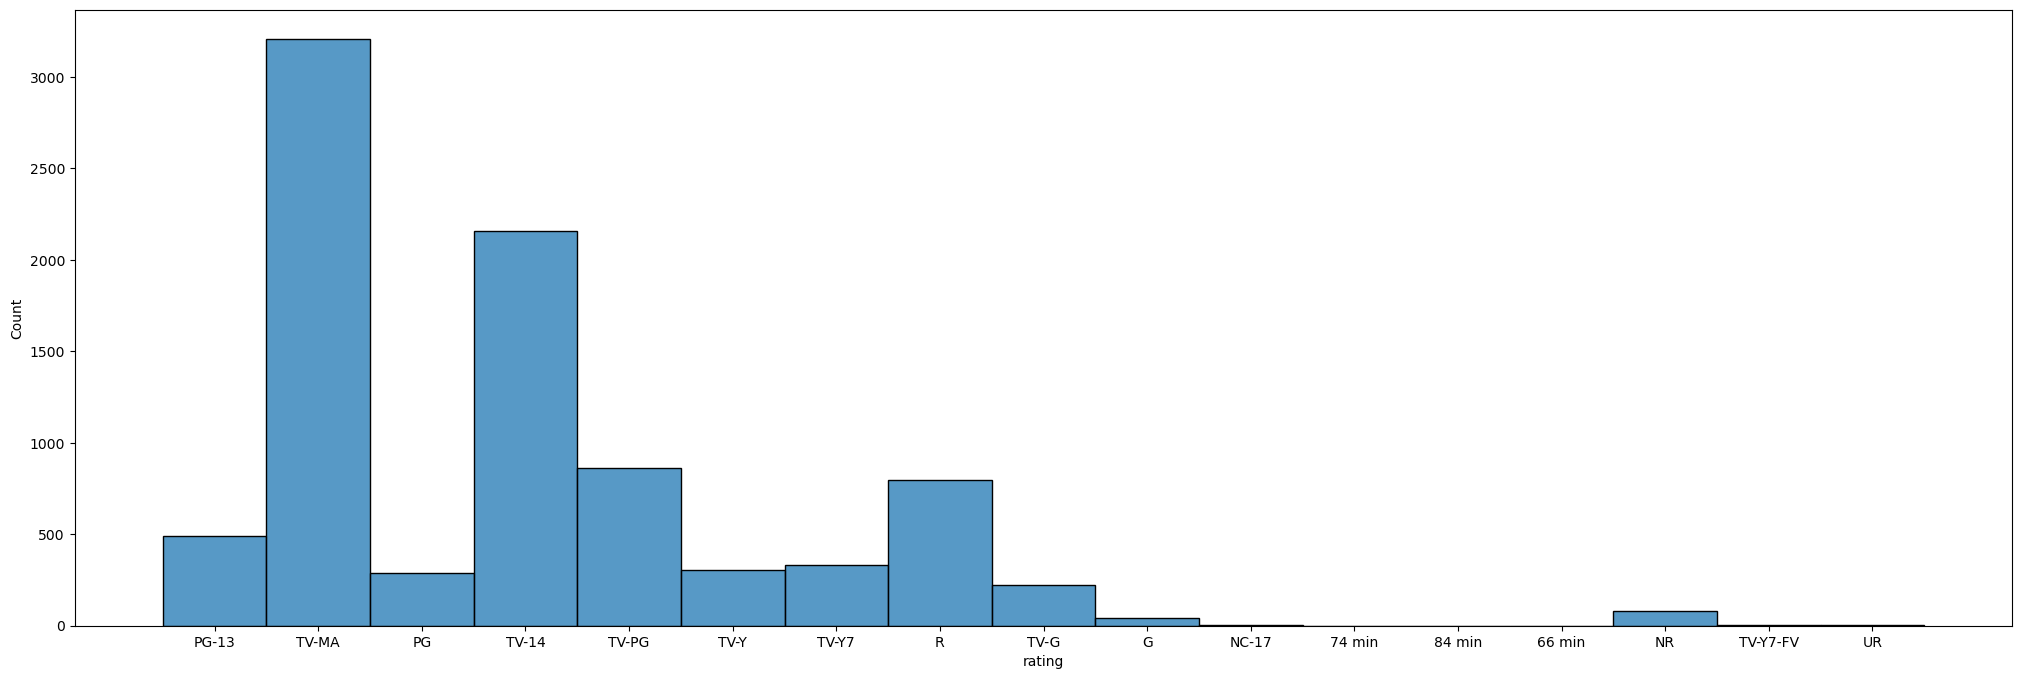

In [26]:
plt.figure(figsize=(25,8))
ax = sns.histplot(data=df, x = "rating")

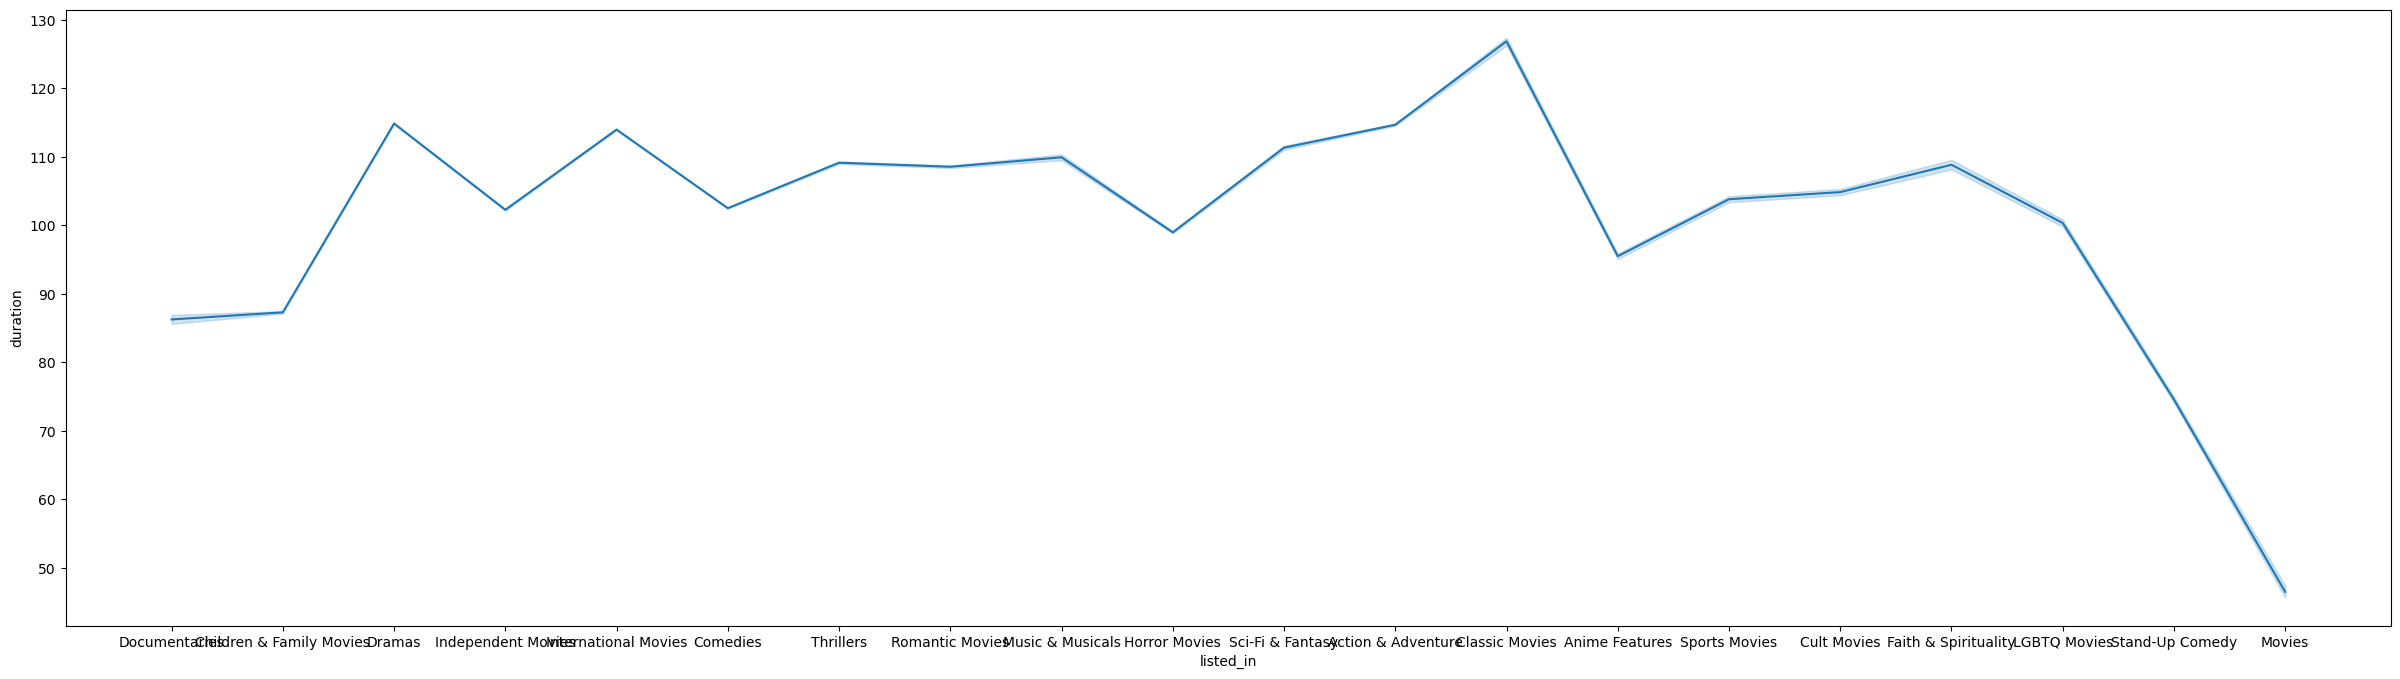

In [27]:
snsDF = cast_listedIn[cast_listedIn['type'] == 'Movie']
plt.figure(figsize = (30,8))
ax = sns.lineplot(data = snsDF, x = "listed_in", y = "duration")

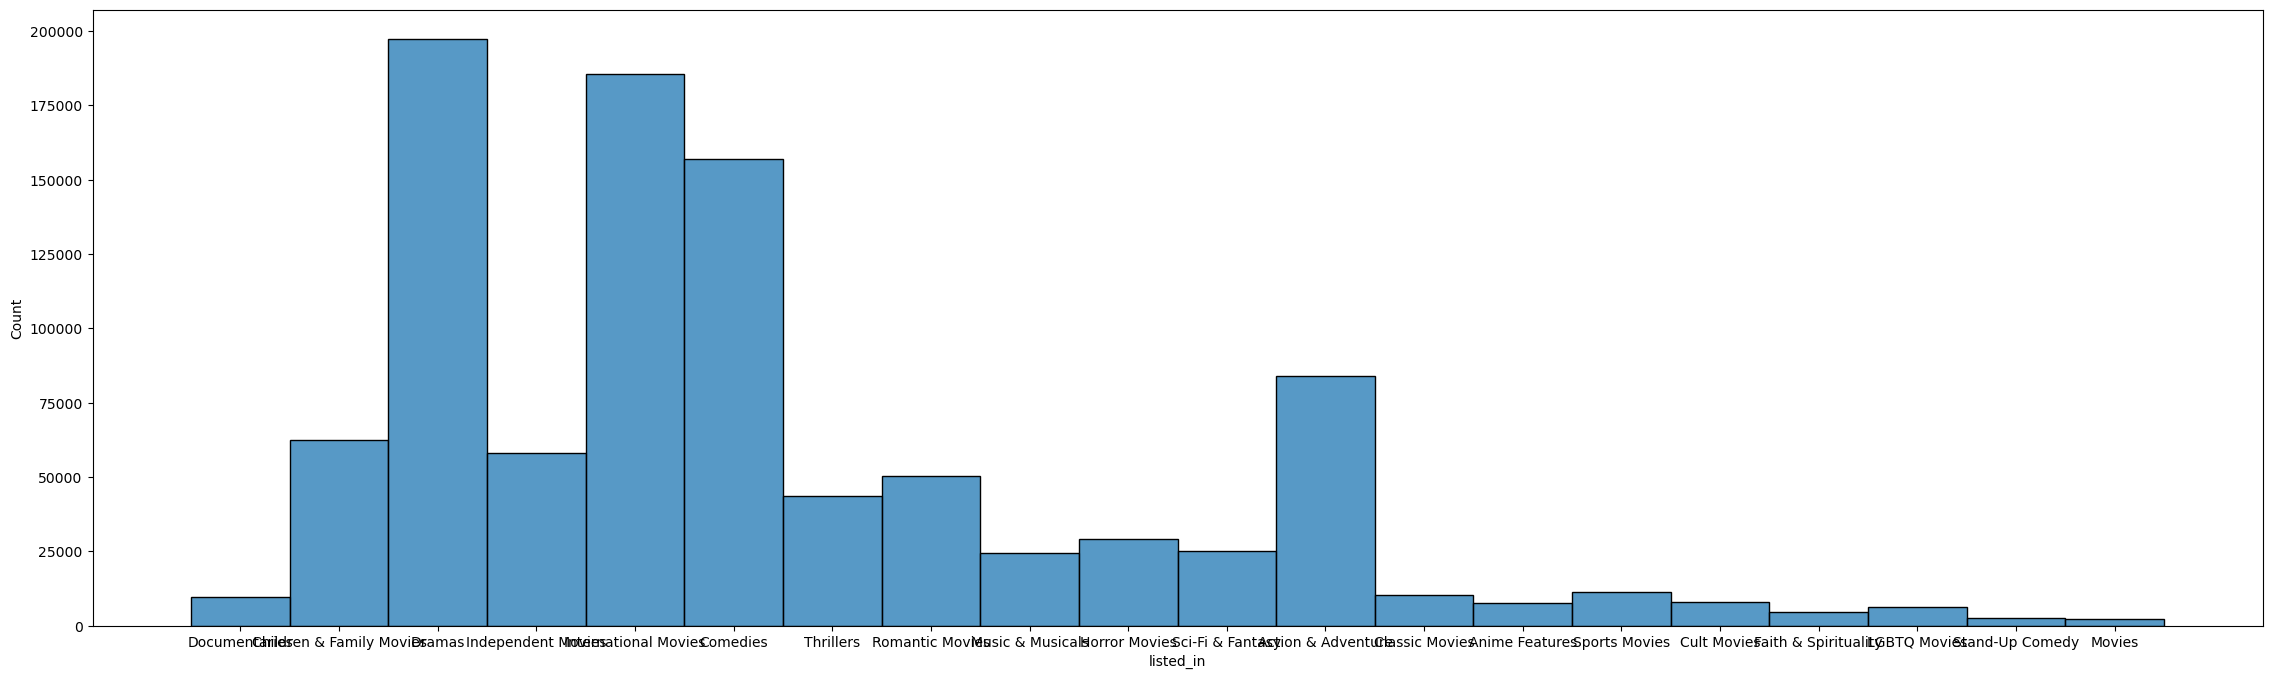

In [28]:
plt.figure(figsize=(28,8))
ax = sns.histplot(data = snsDF, x = "listed_in")

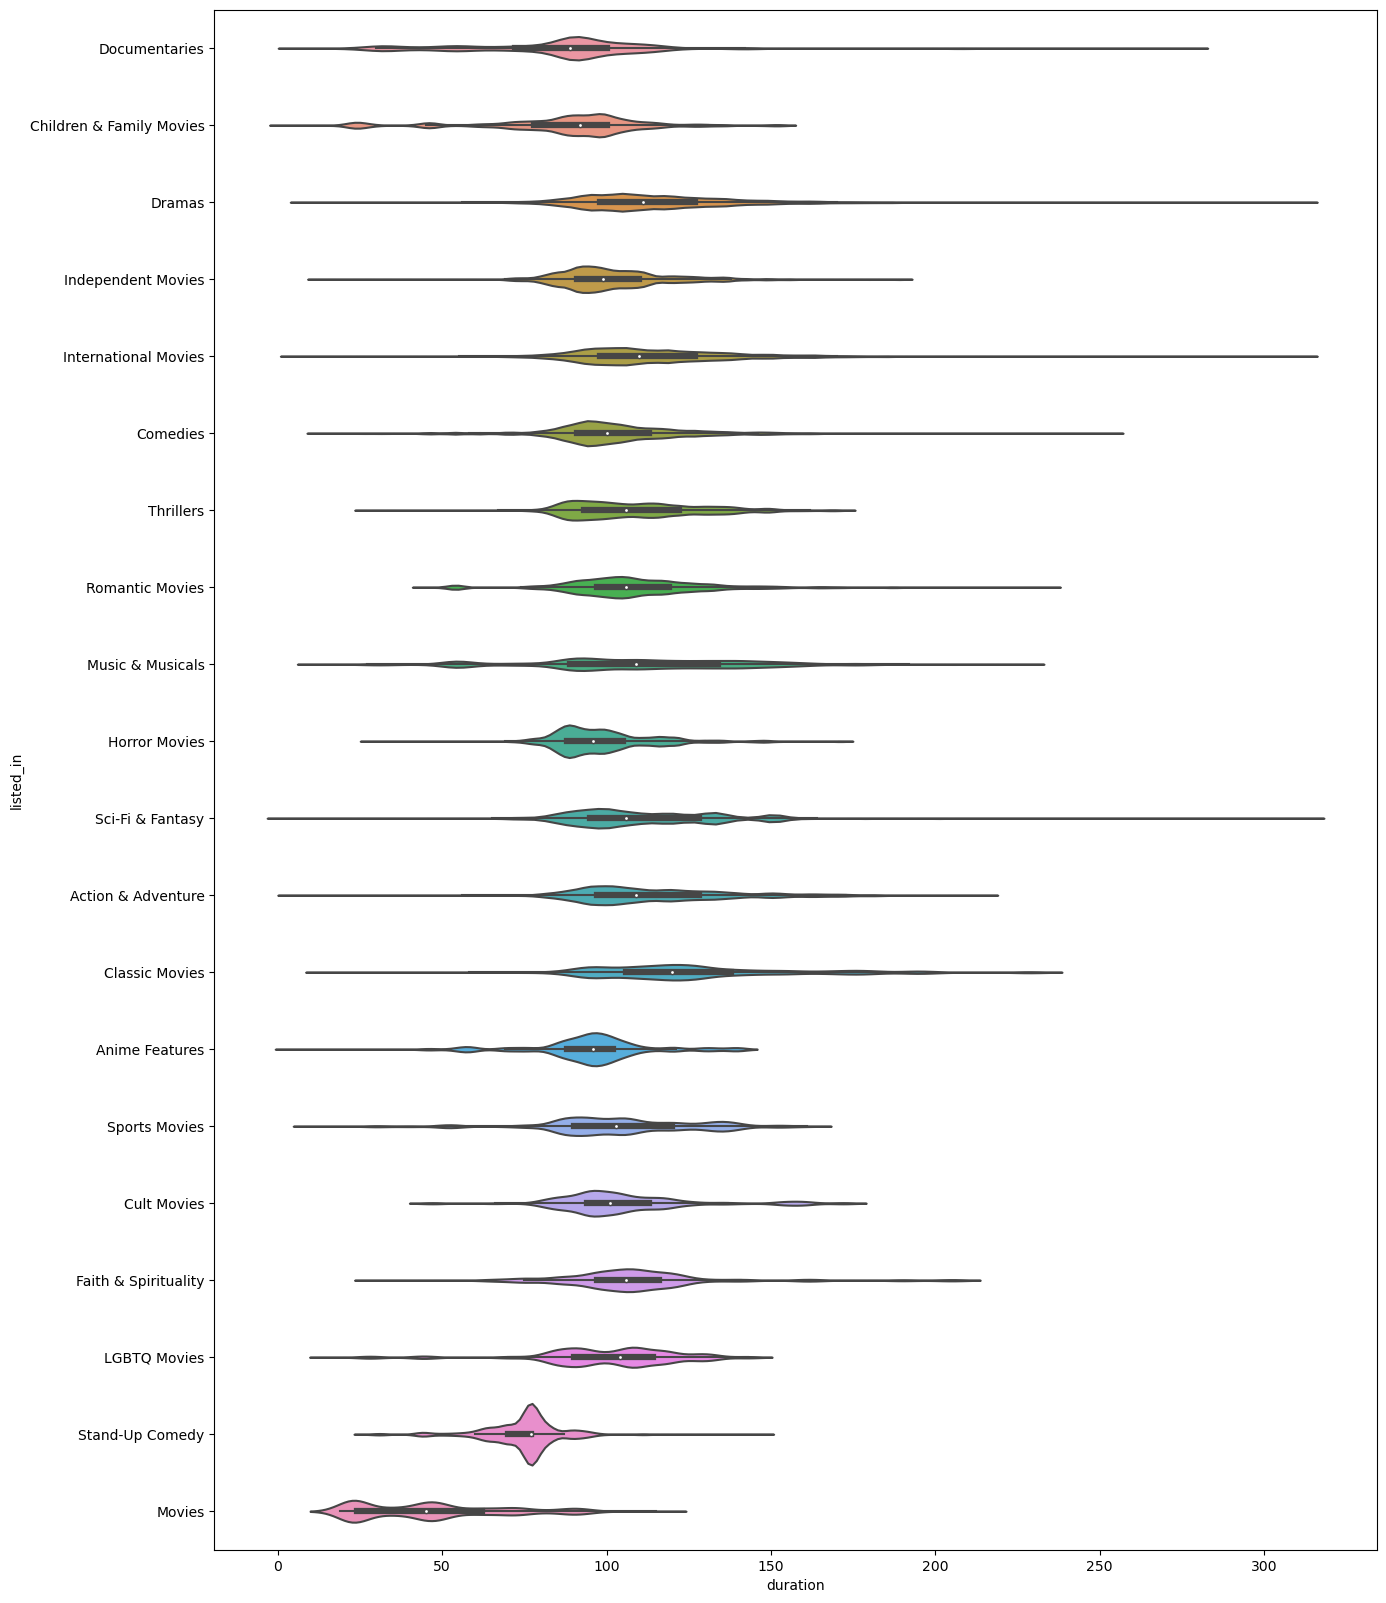

In [29]:
plt.figure(figsize = (15,20))
ax = sns.violinplot(data = snsDF, x = "duration", y = "listed_in")

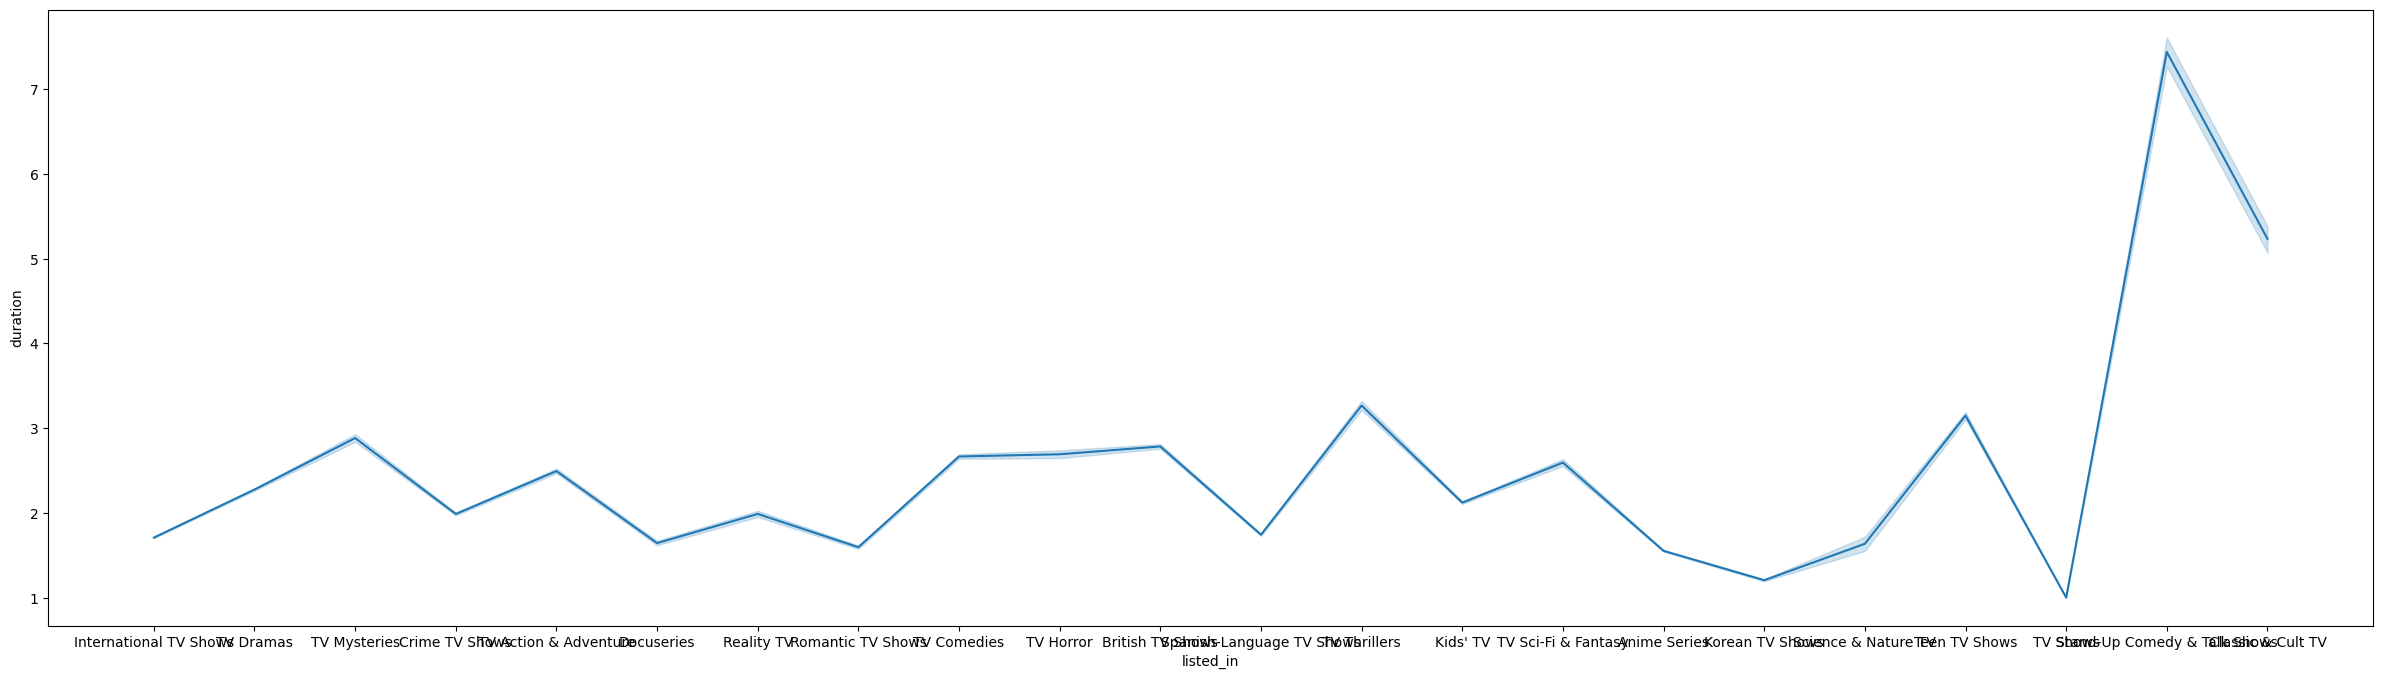

In [30]:
snsDF = cast_listedIn[cast_listedIn['type'] == 'TV Show']
plt.figure(figsize = (30,8))
ax = sns.lineplot(data = snsDF, x = "listed_in", y = "duration")

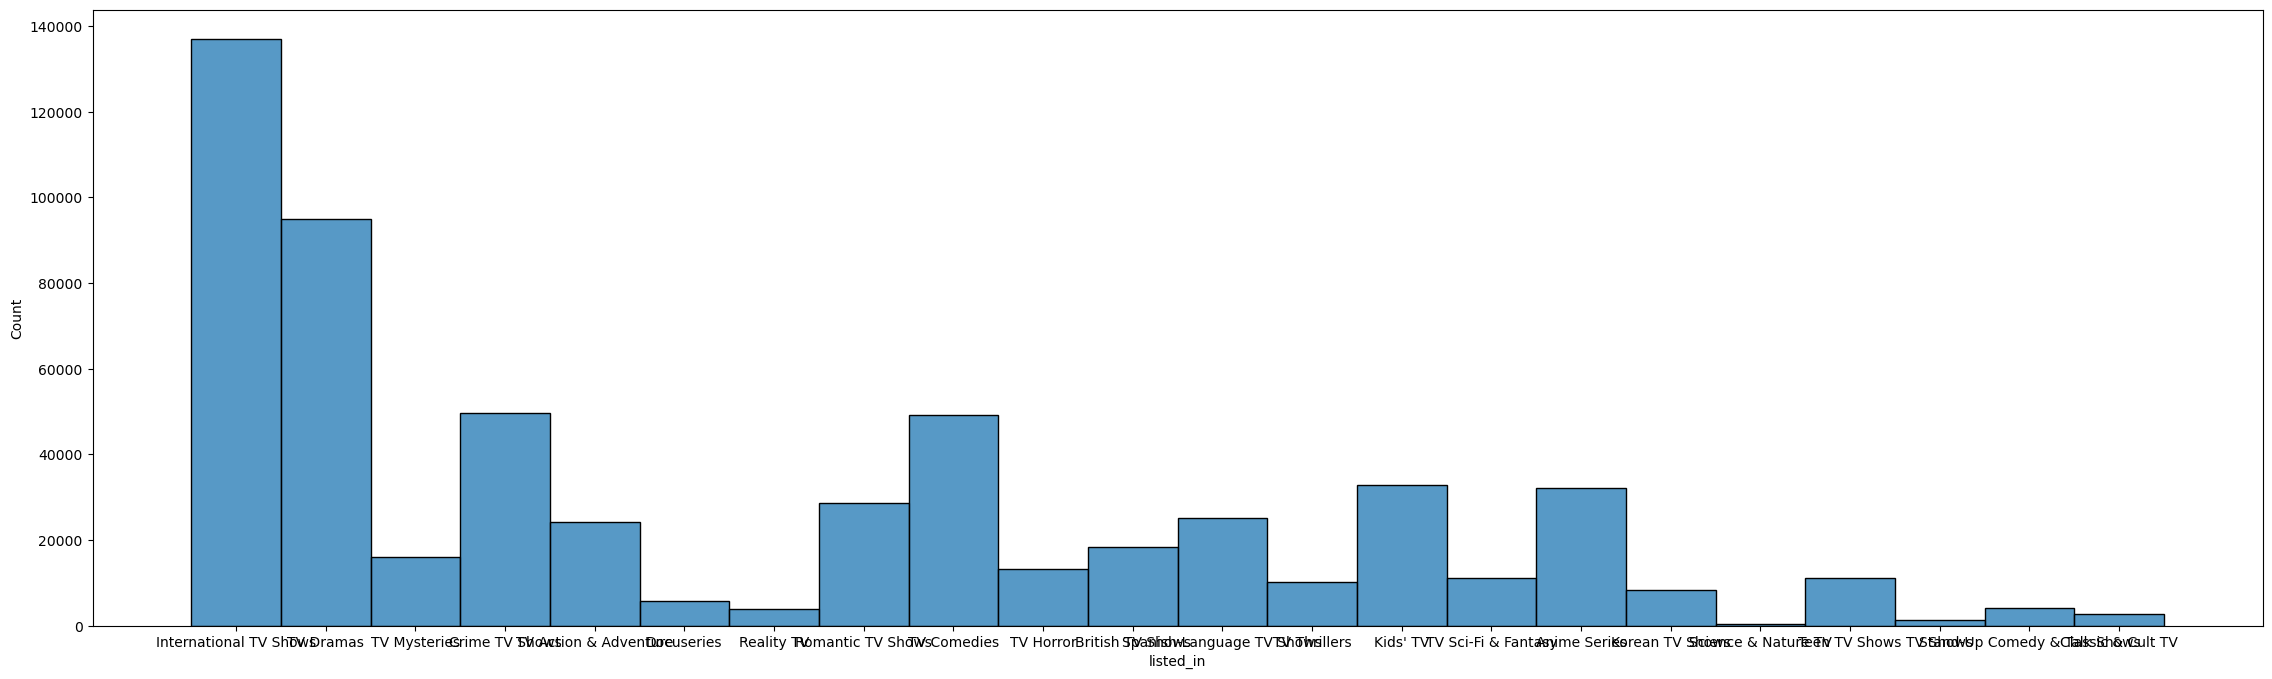

In [31]:
plt.figure(figsize=(28,8))
ax = sns.histplot(data = snsDF, x = "listed_in")

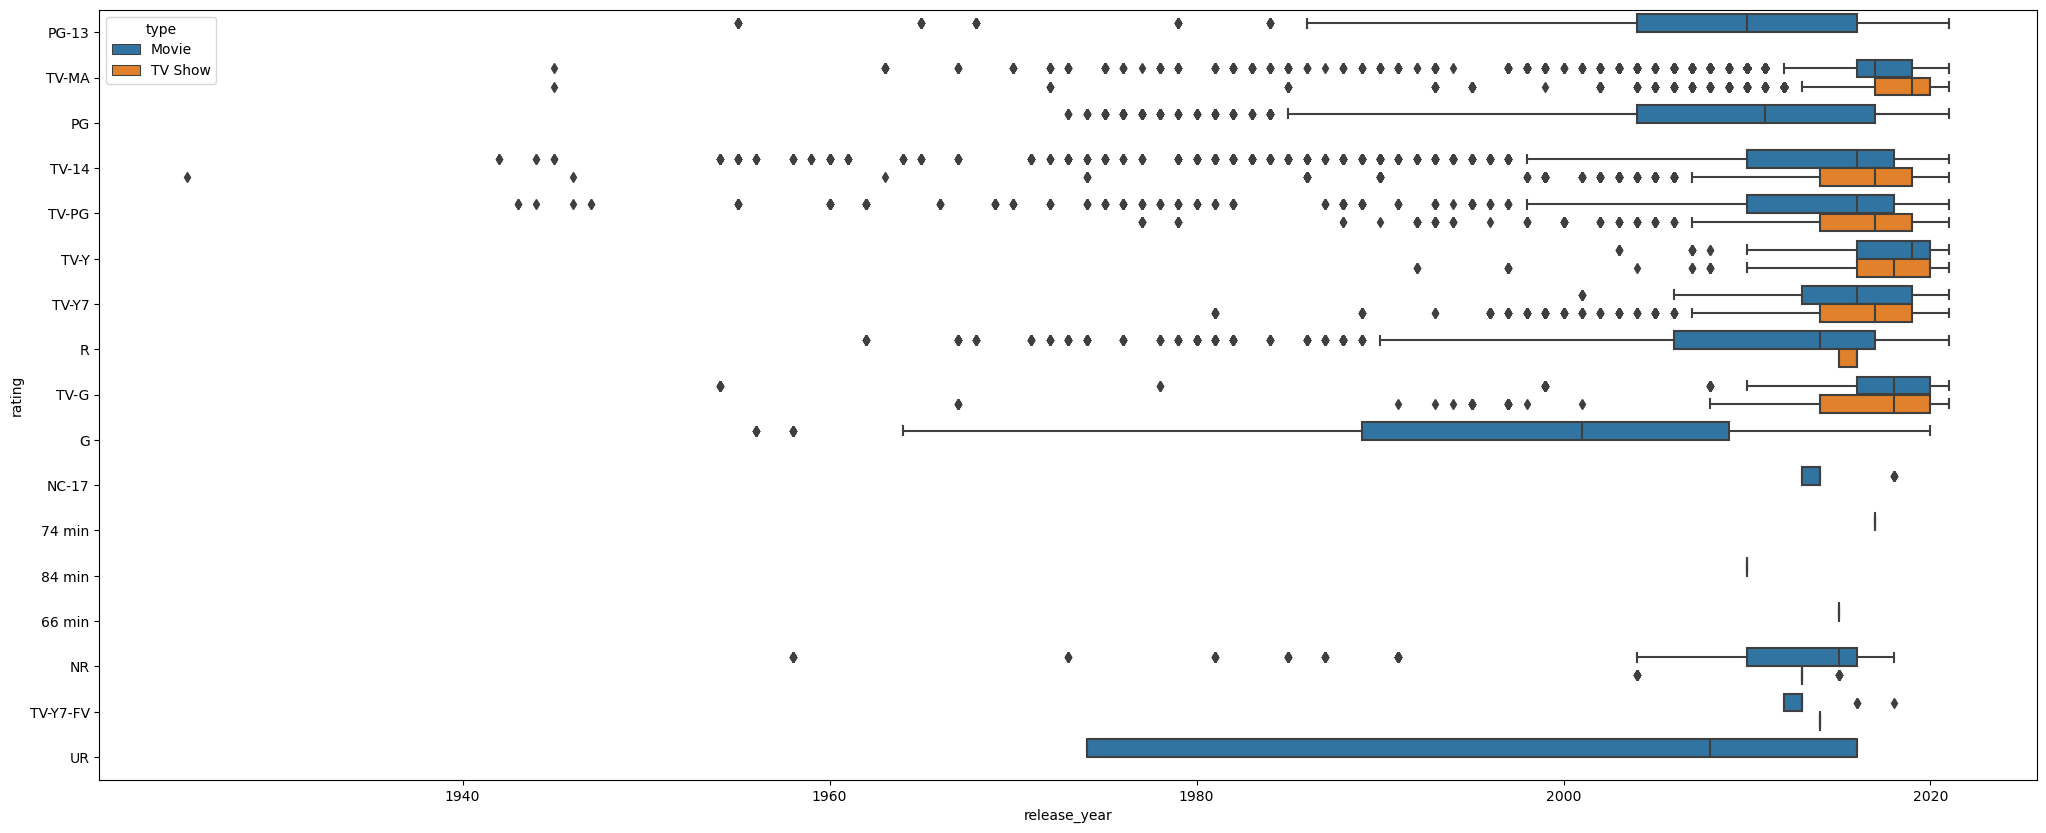

In [32]:
plt.figure(figsize = (25,10))
ax = sns.boxplot(data=dfC, x="release_year", y="rating", hue = 'type')

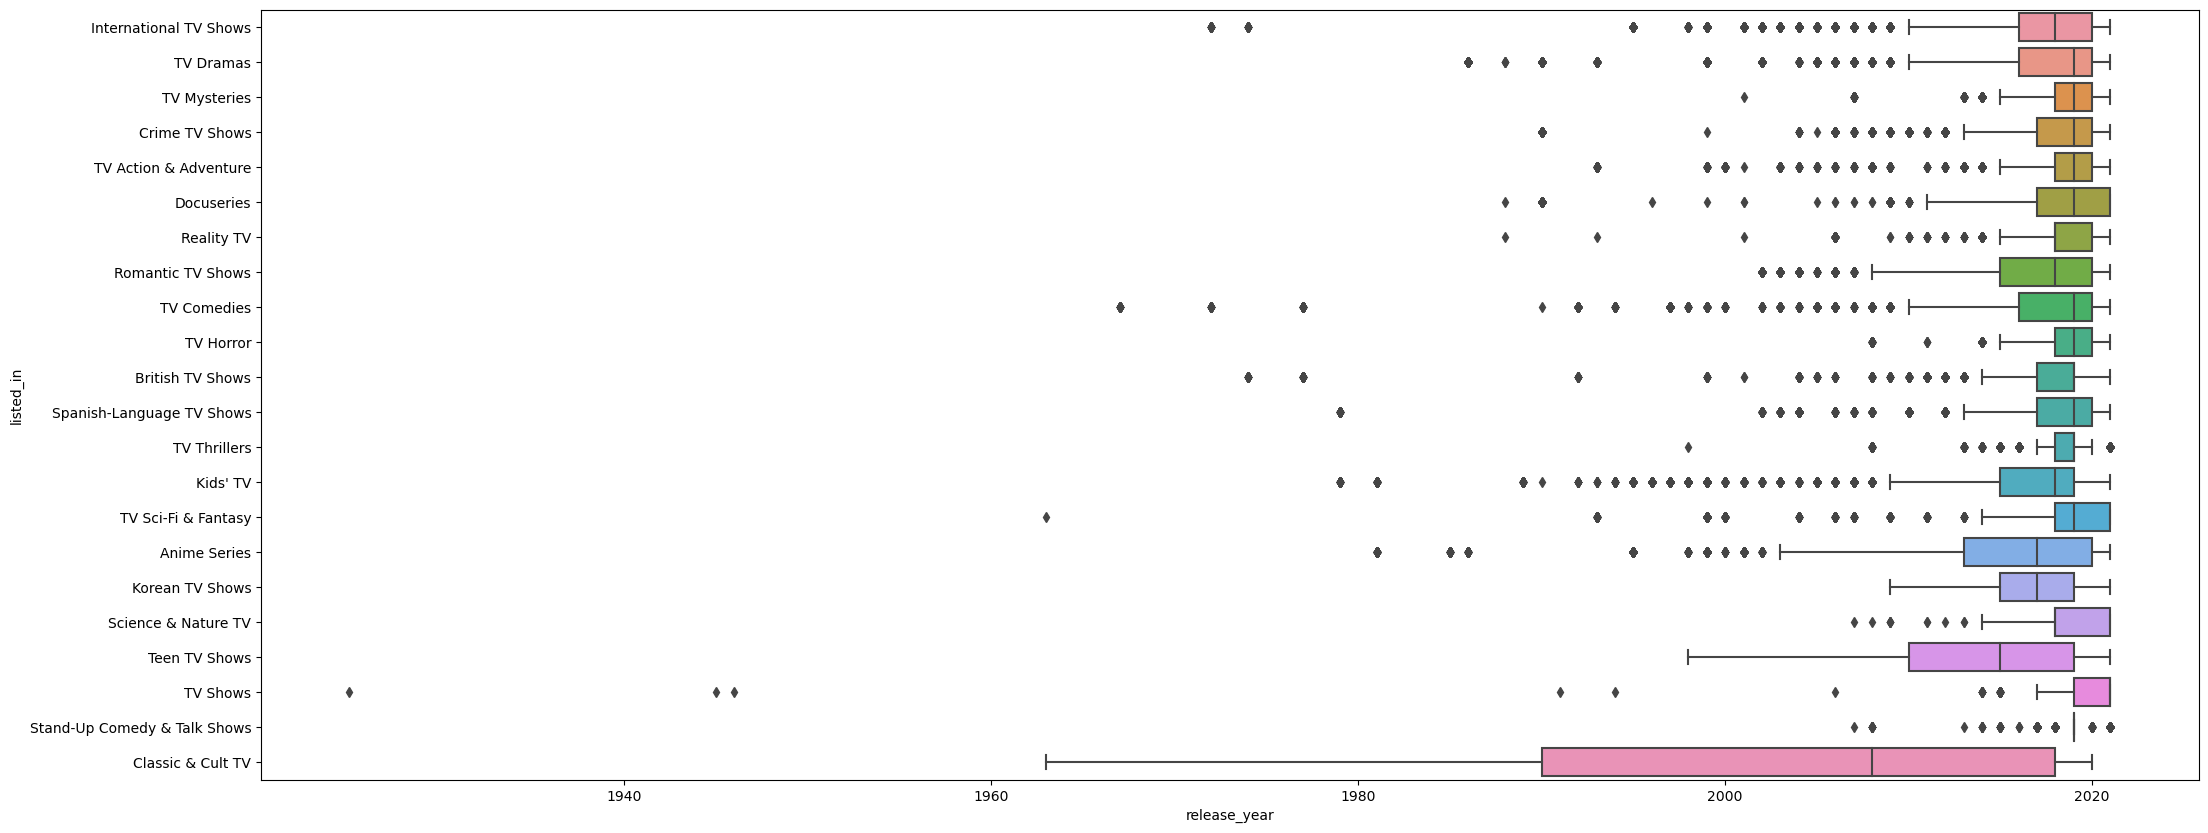

In [33]:
plt.figure(figsize = (25,10))
ax = sns.boxplot(data=snsDF, x="release_year", y="listed_in")

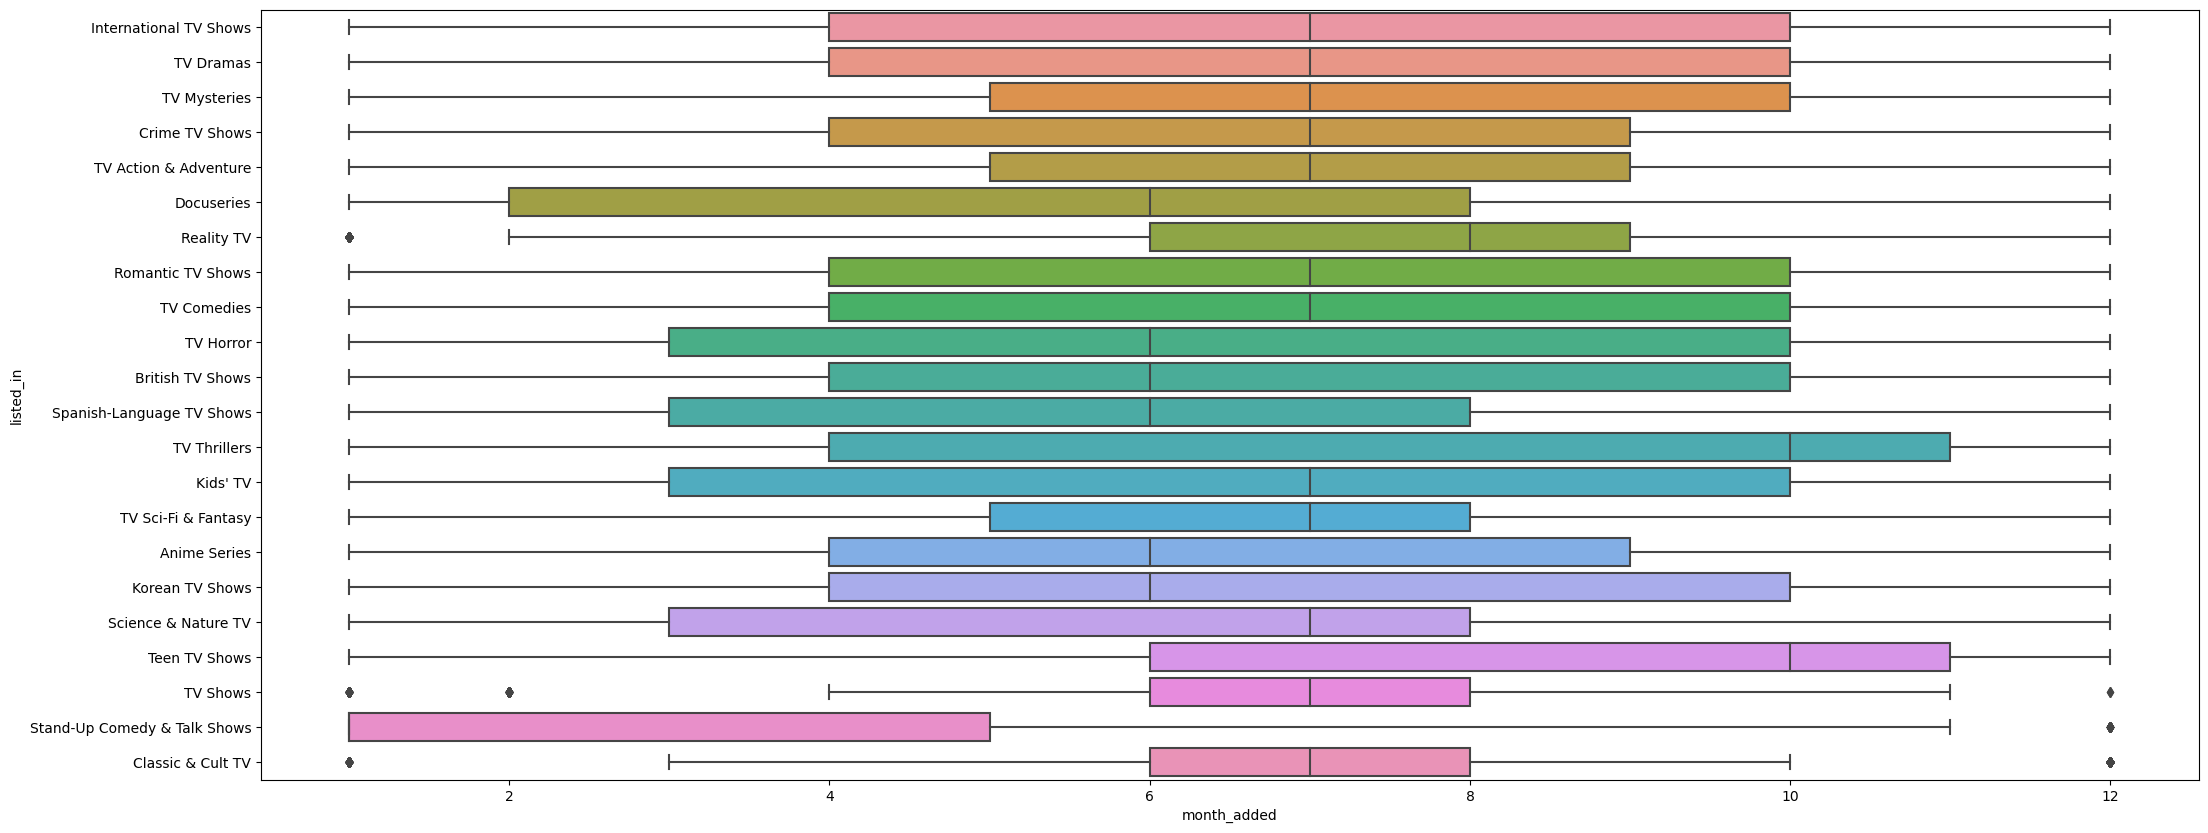

In [34]:
plt.figure(figsize = (25,10))
ax = sns.boxplot(data=snsDF, x="month_added", y="listed_in")

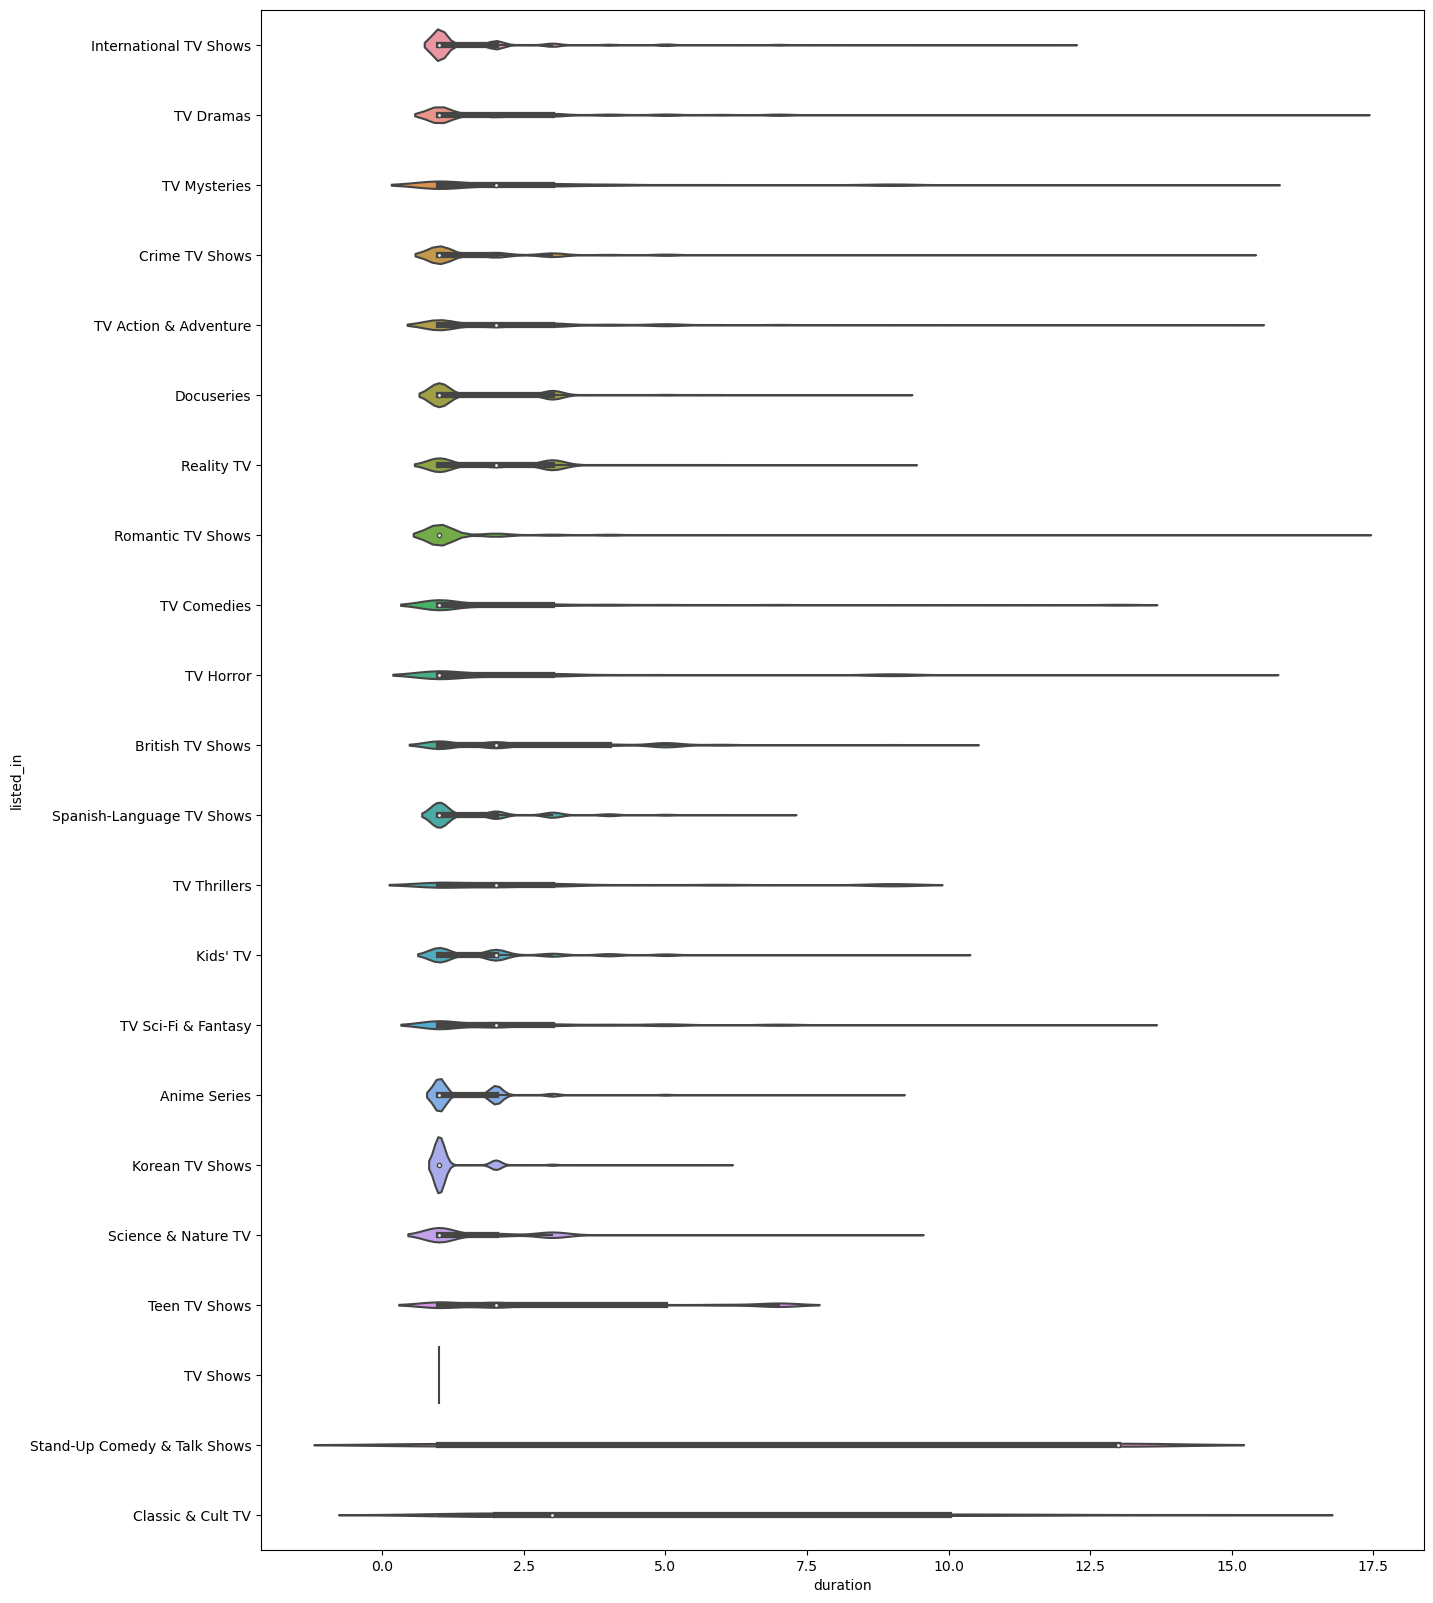

In [35]:
plt.figure(figsize = (15,20))
ax = sns.violinplot(data = snsDF, x = "duration", y = "listed_in")

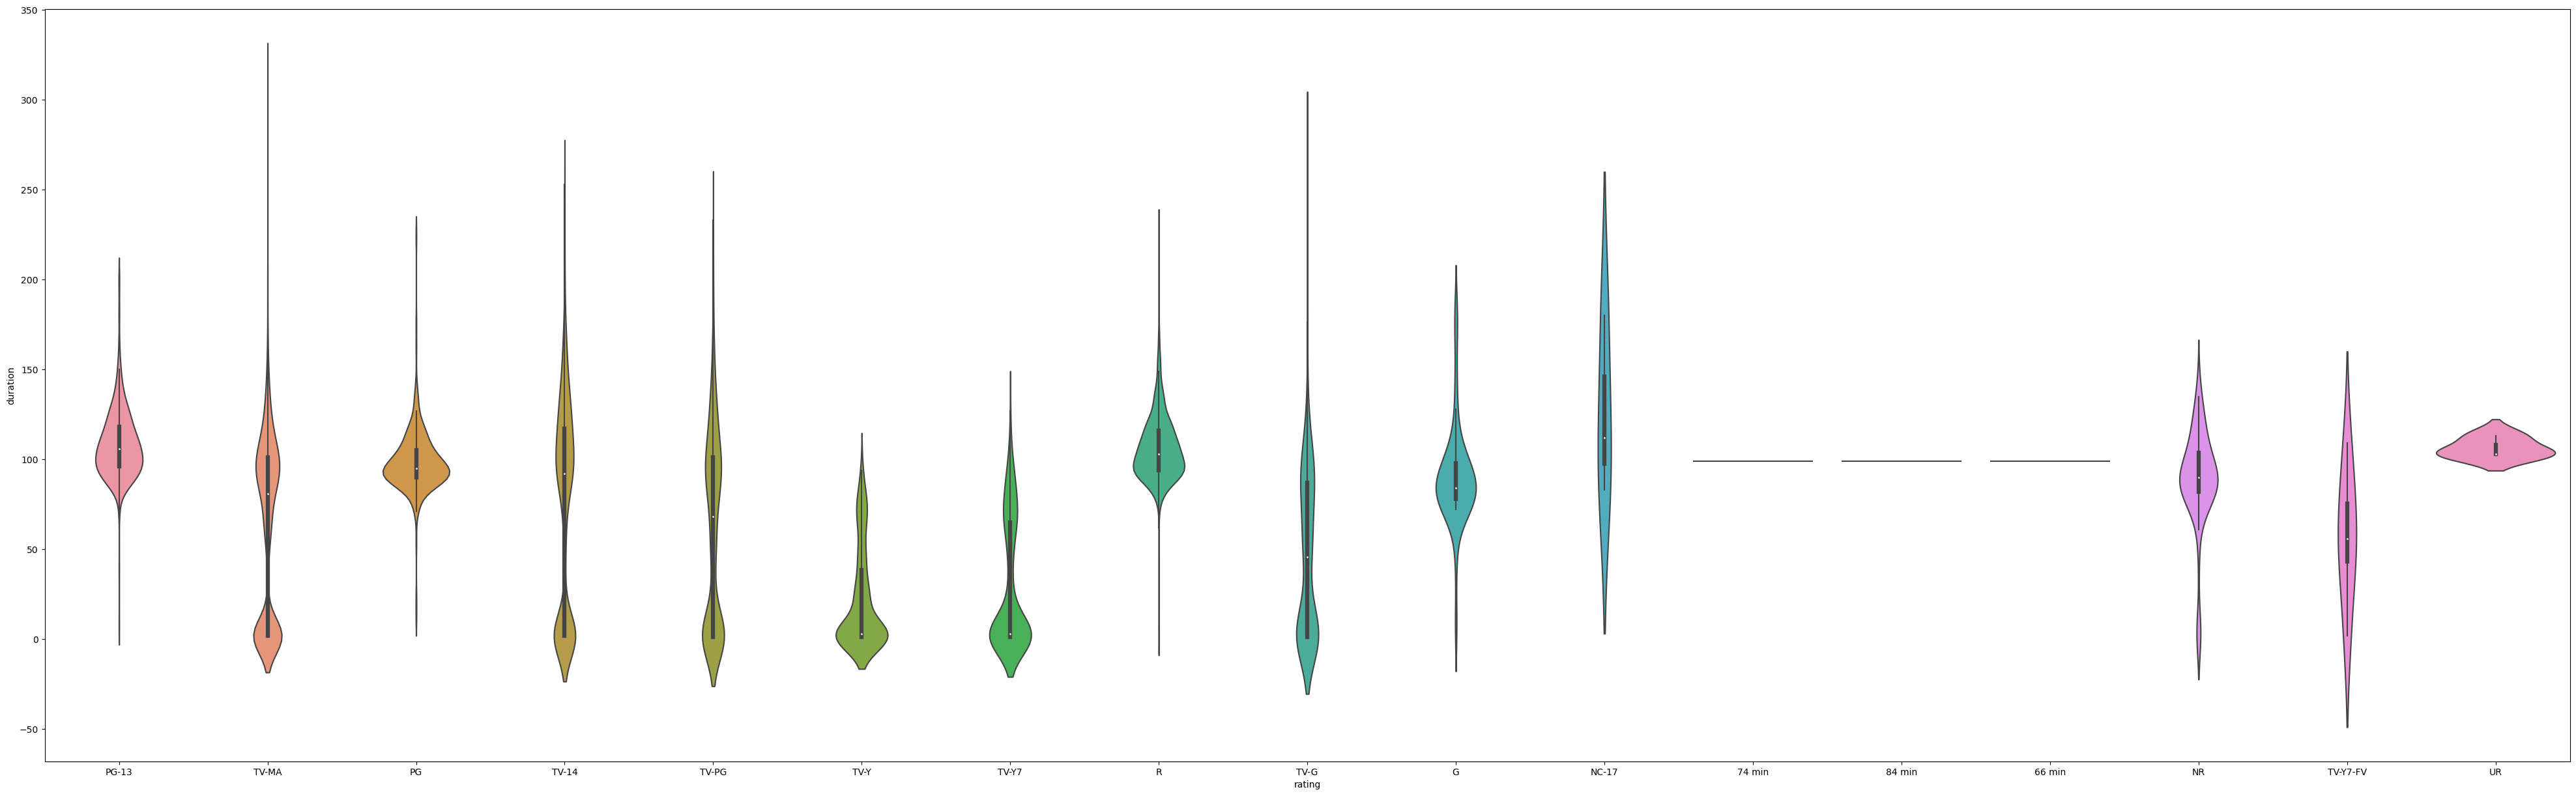

In [36]:
plt.figure(figsize = (50,15))
ax = sns.violinplot(data=df, x="rating", y="duration")

<AxesSubplot:xlabel='listed_in', ylabel='duration'>

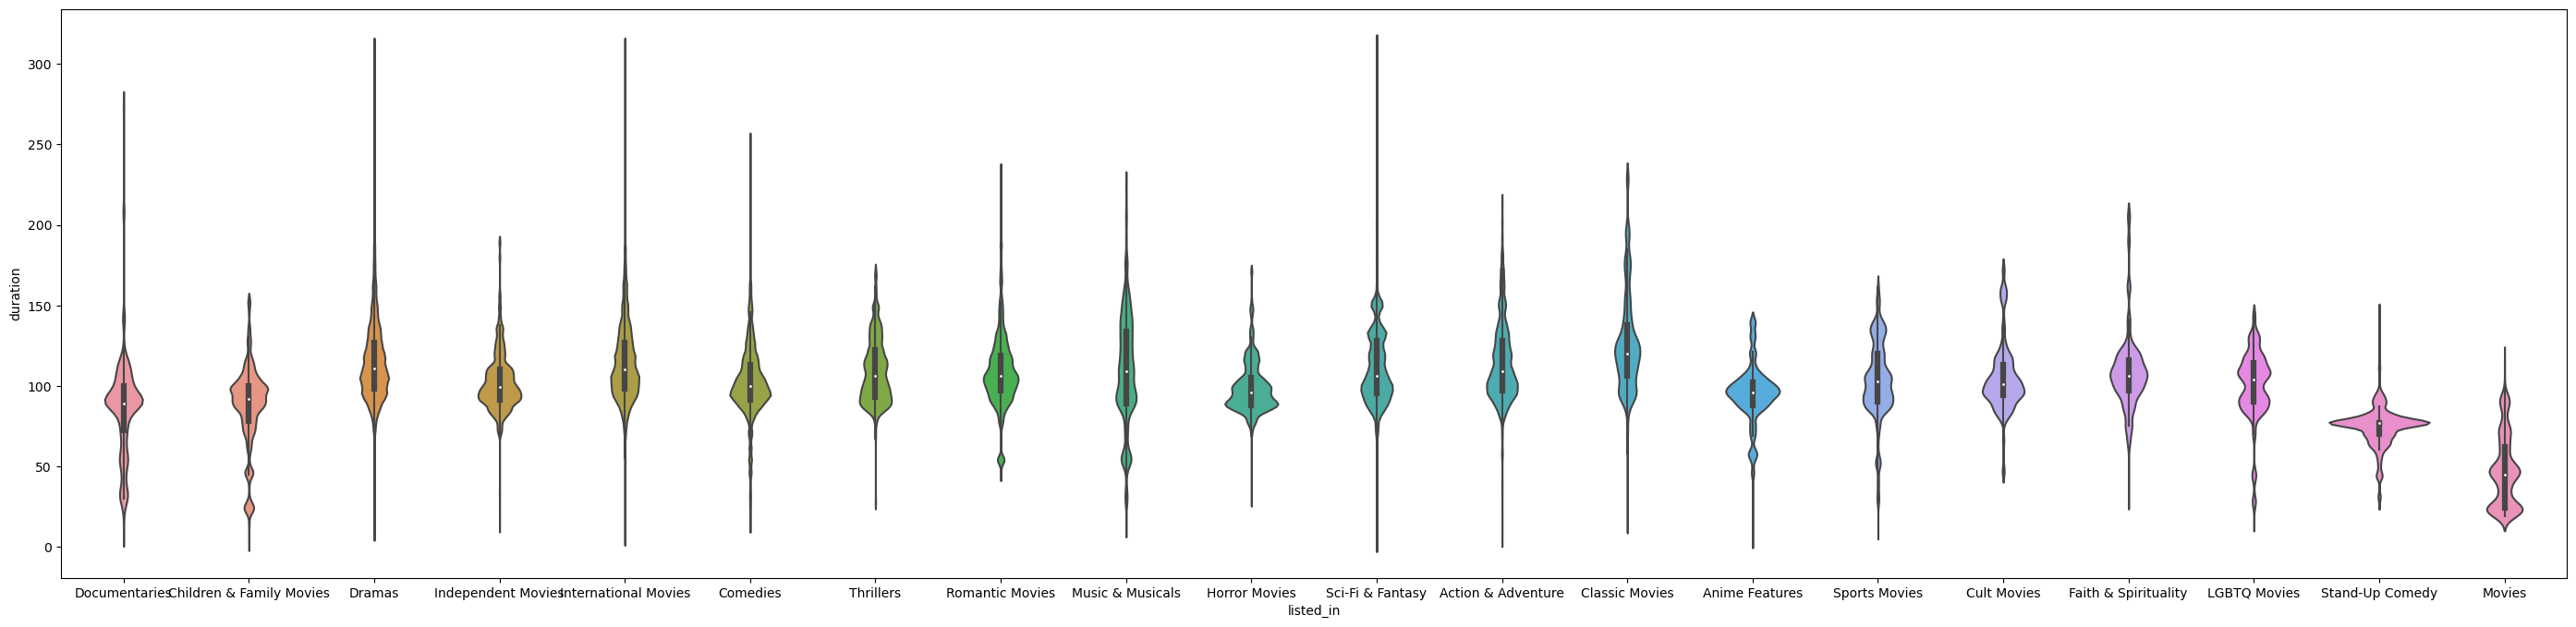

In [37]:
snsDF = cast_listedIn[cast_listedIn['type'] == 'Movie']
plt.figure(figsize = (35,8))
sns.violinplot(data = snsDF, x = "listed_in", y = "duration")

In [38]:
country_df = dfC[(dfC['country'] == 'India') & (dfC['type'] == 'Movie')]
country_df['cast'].value_counts()

Anupam Kher              40
Shah Rukh Khan           32
Naseeruddin Shah         29
Amitabh Bachchan         28
Akshay Kumar             28
                         ..
Gagan Kokri               1
Aditi Sharma              1
Nisha Bano                1
Rahul Jungral             1
Chittaranjan Tripathy     1
Name: cast, Length: 3383, dtype: int64

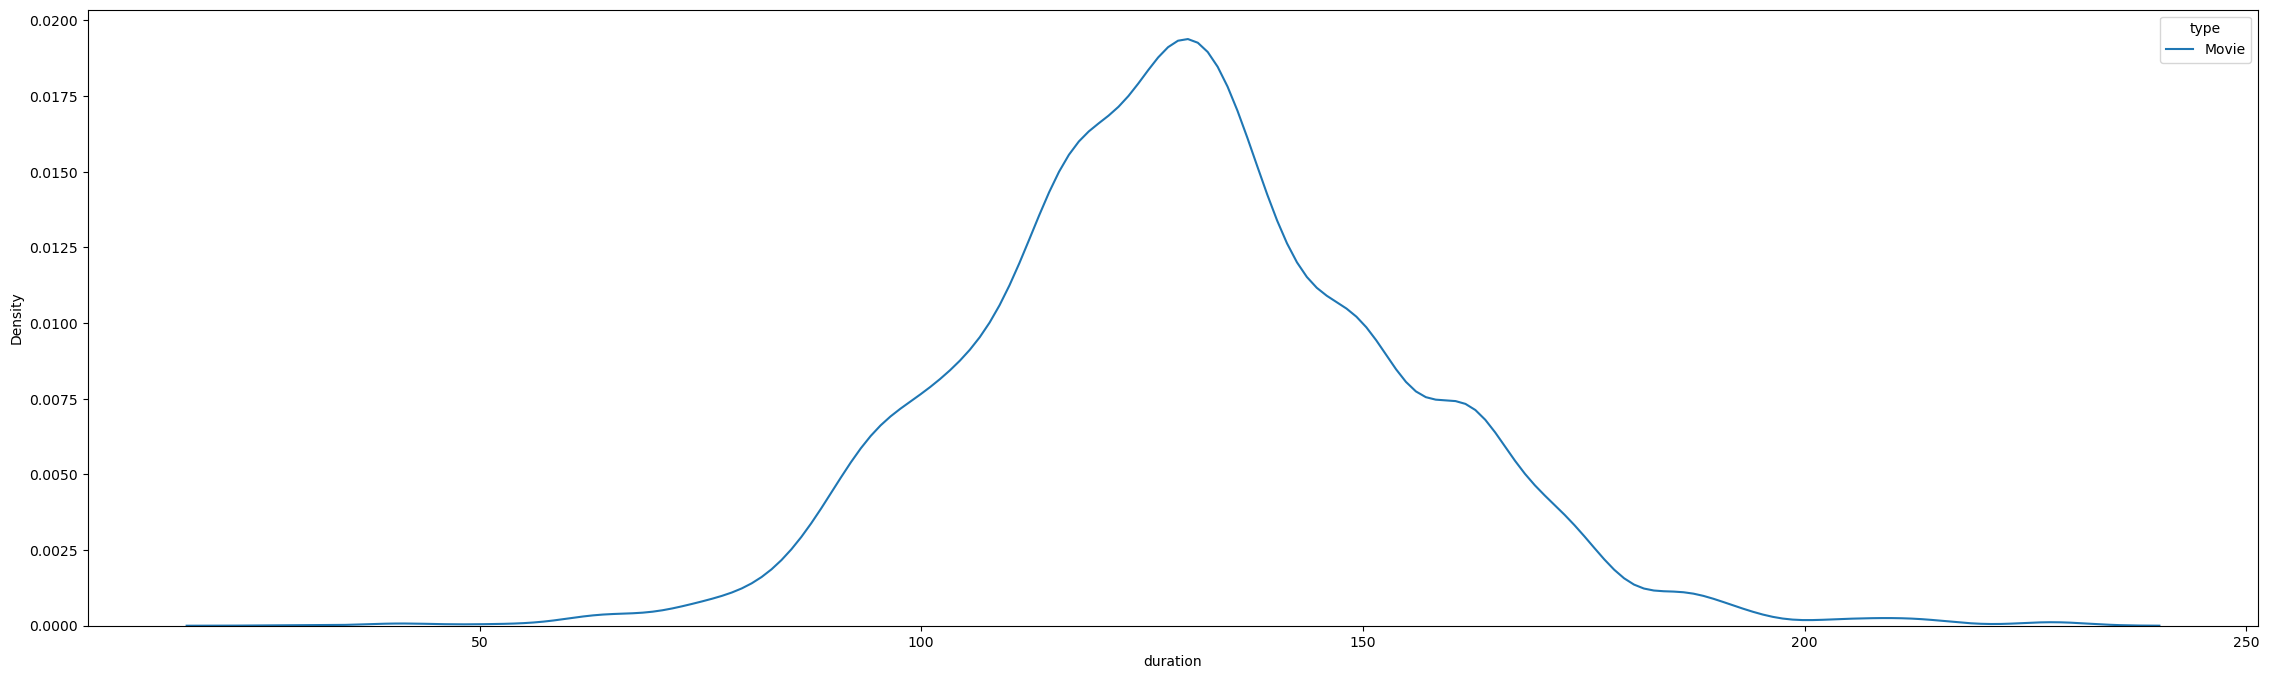

In [39]:
plt.figure(figsize=(28,8))
ax = sns.kdeplot(data = country_df, x = "duration", hue = 'type')

In [40]:
df['month_added'].value_counts()

7     827
12    813
9     770
4     764
10    760
8     755
3     742
6     738
1     738
11    705
5     632
2     563
Name: month_added, dtype: int64

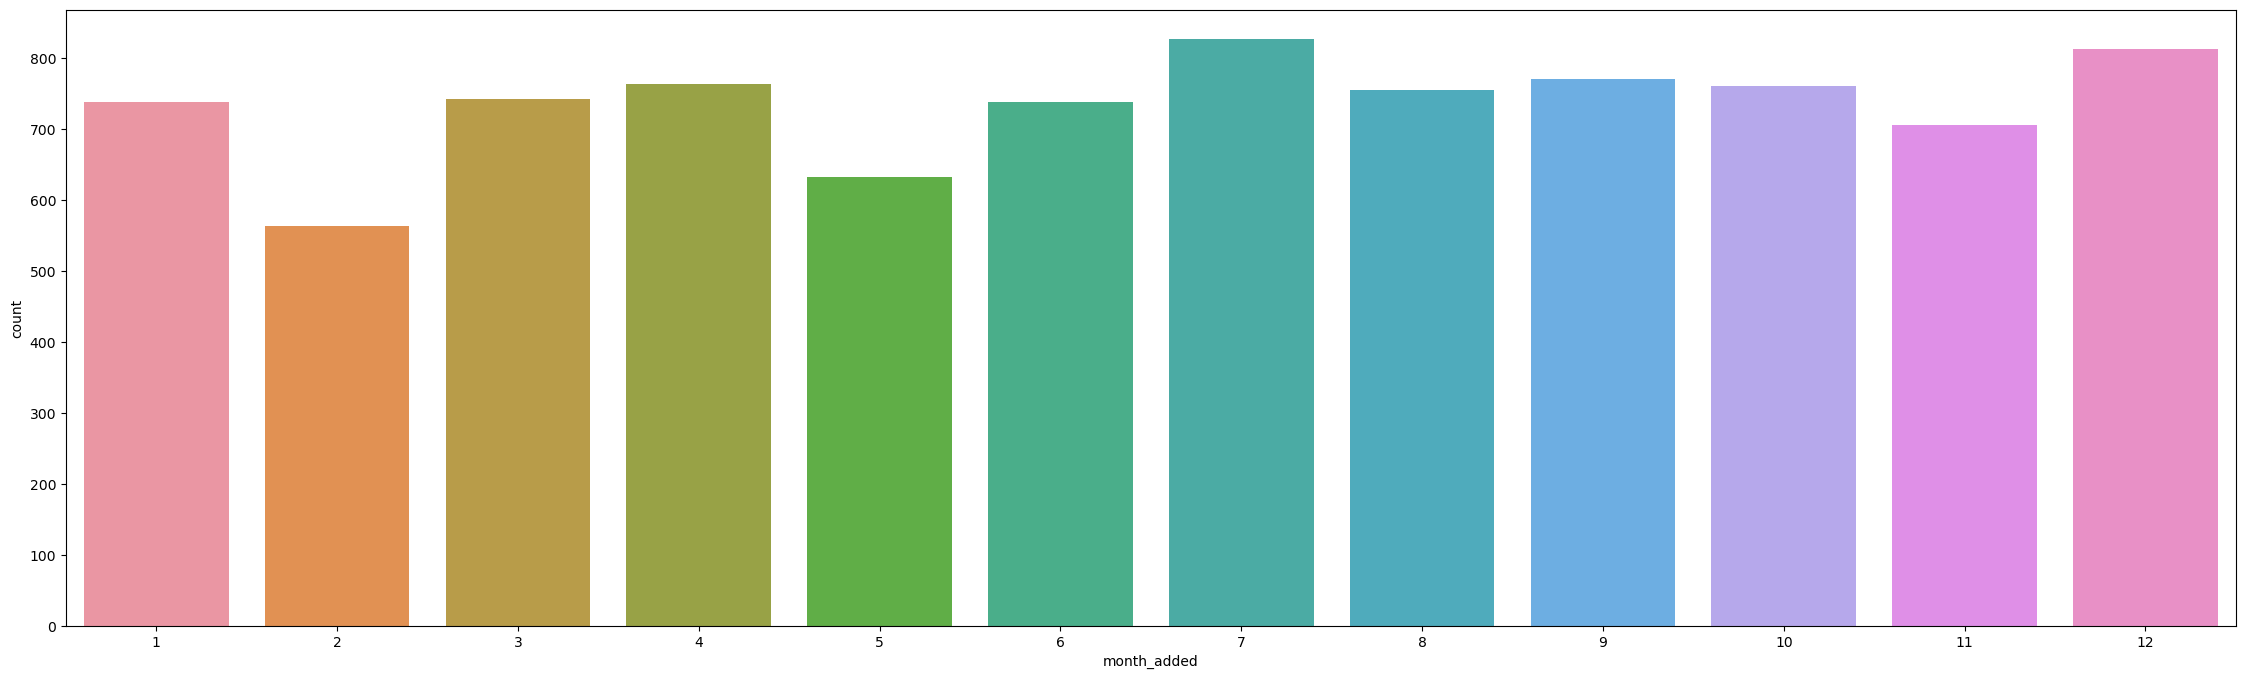

In [41]:
plt.figure(figsize=(28,8))
ax = sns.countplot(data = df, x = "month_added")

<AxesSubplot:xlabel='rating', ylabel='month_added'>

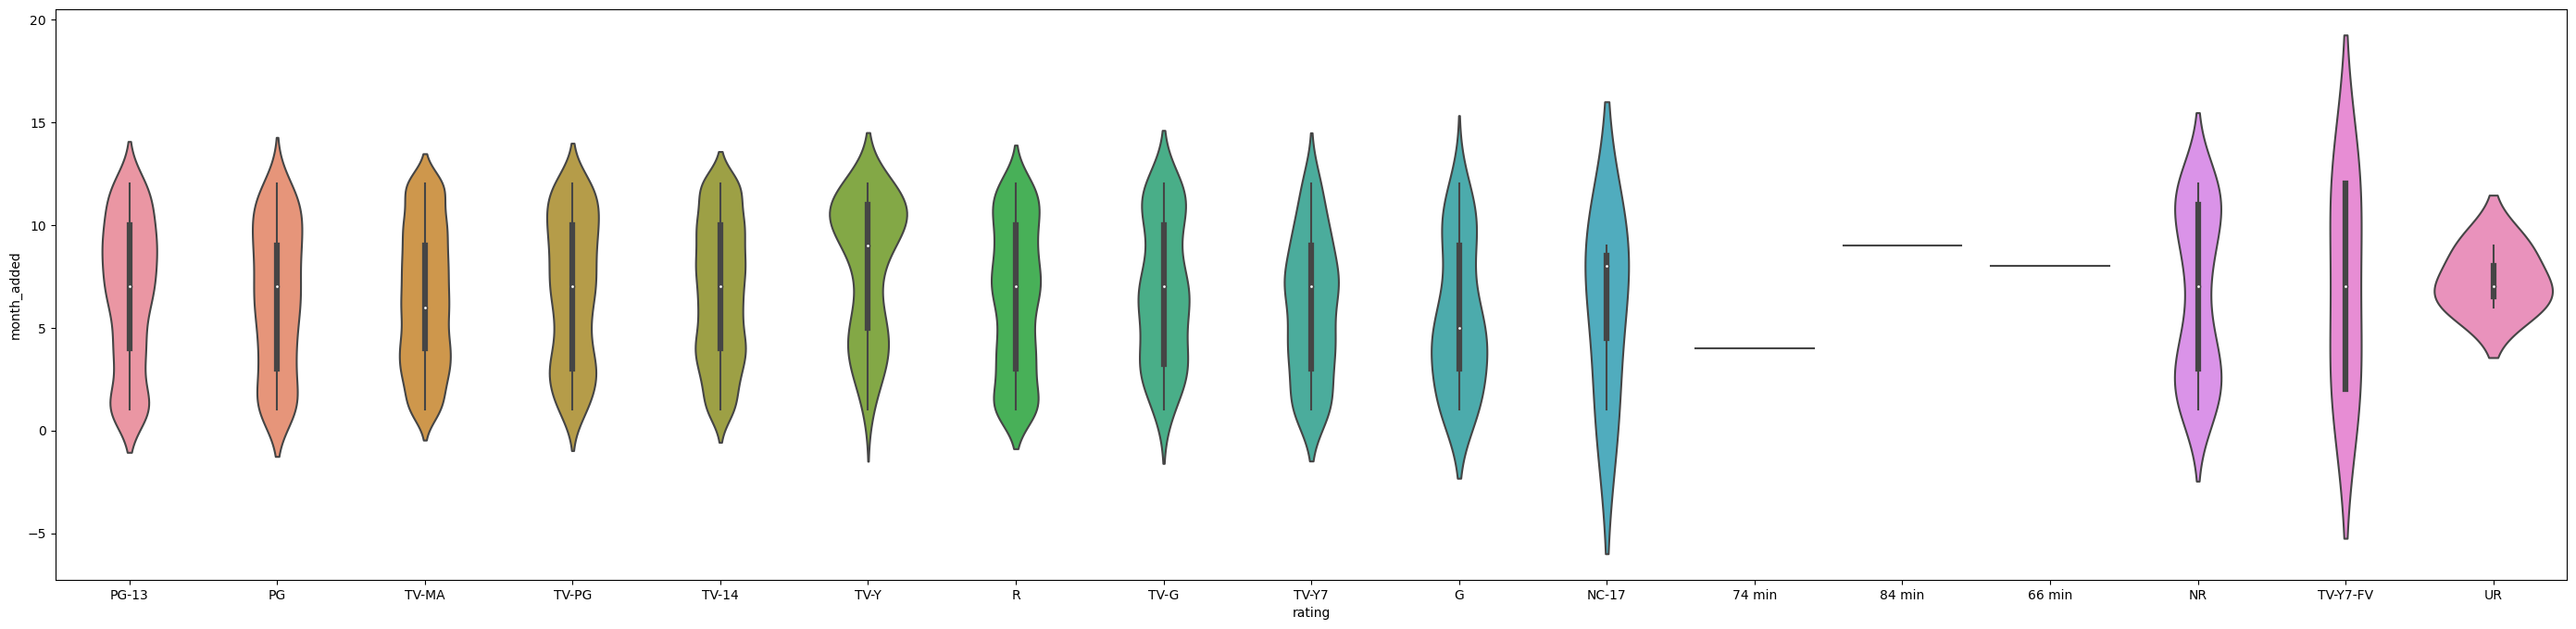

In [42]:
snsDF = df[df['type'] == 'Movie']
plt.figure(figsize = (35,8))
sns.violinplot(data = snsDF, x = "rating", y = "month_added")

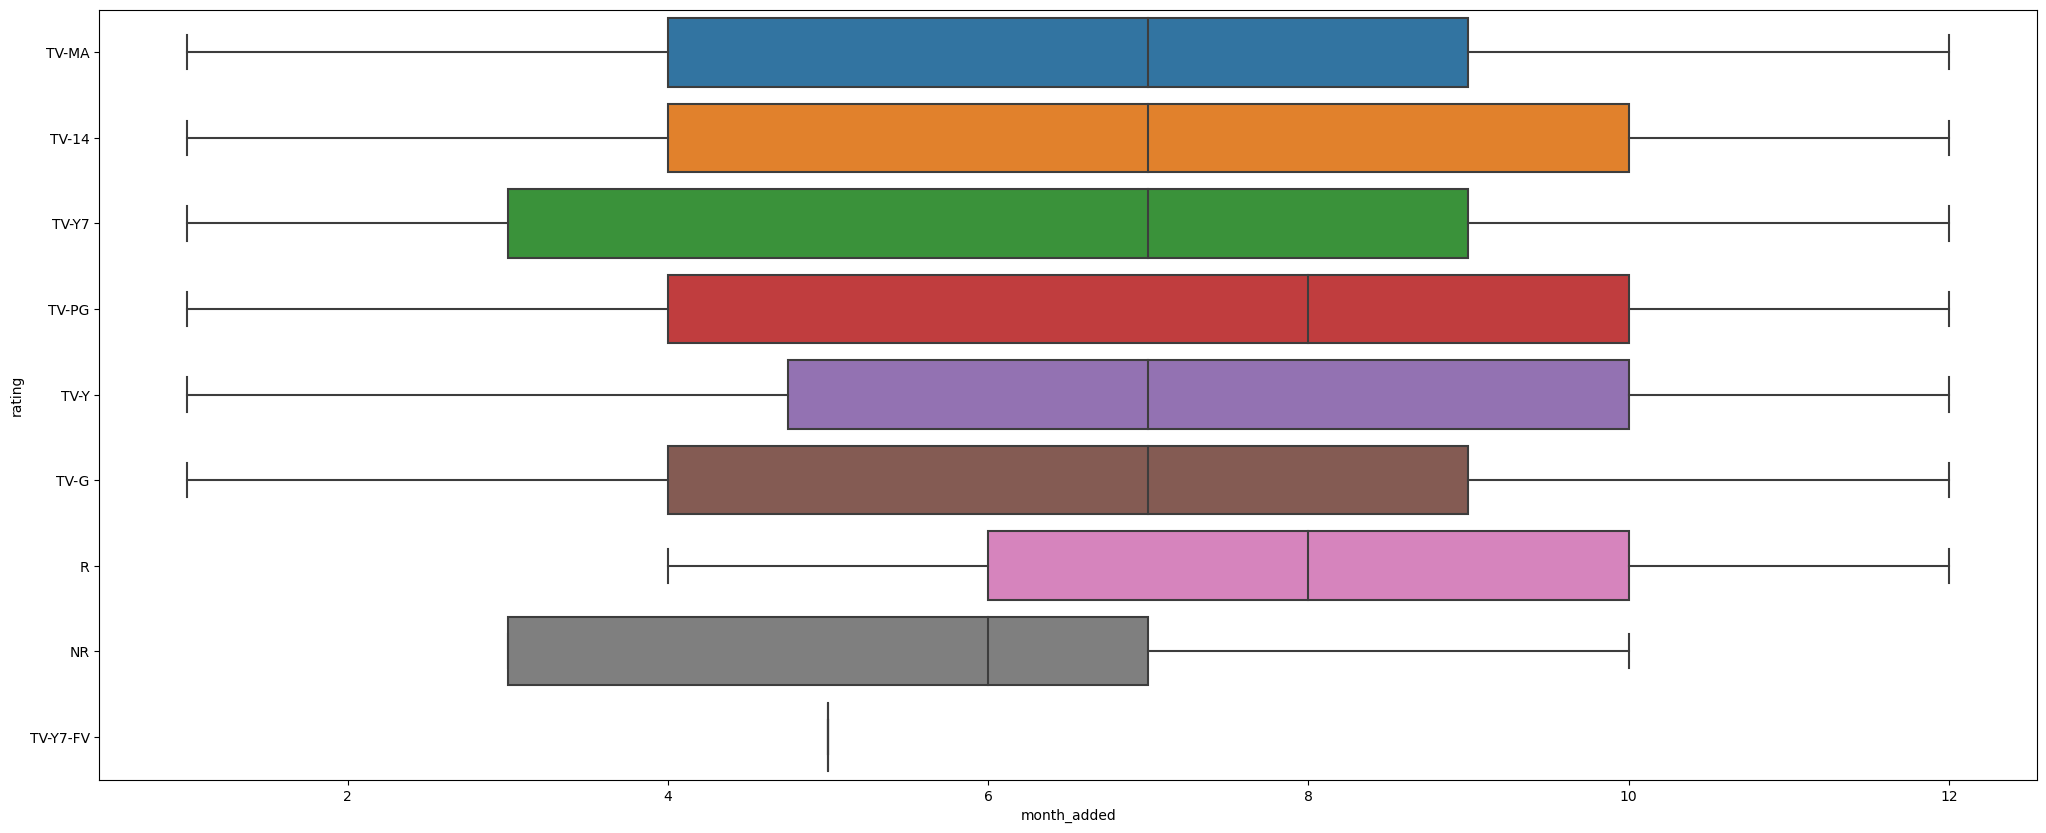

In [43]:
snsDF = df[df['type'] == 'TV Show']
plt.figure(figsize = (25,10))
ax = sns.boxplot(data=snsDF, x="month_added", y="rating")

<Figure size 2500x800 with 0 Axes>

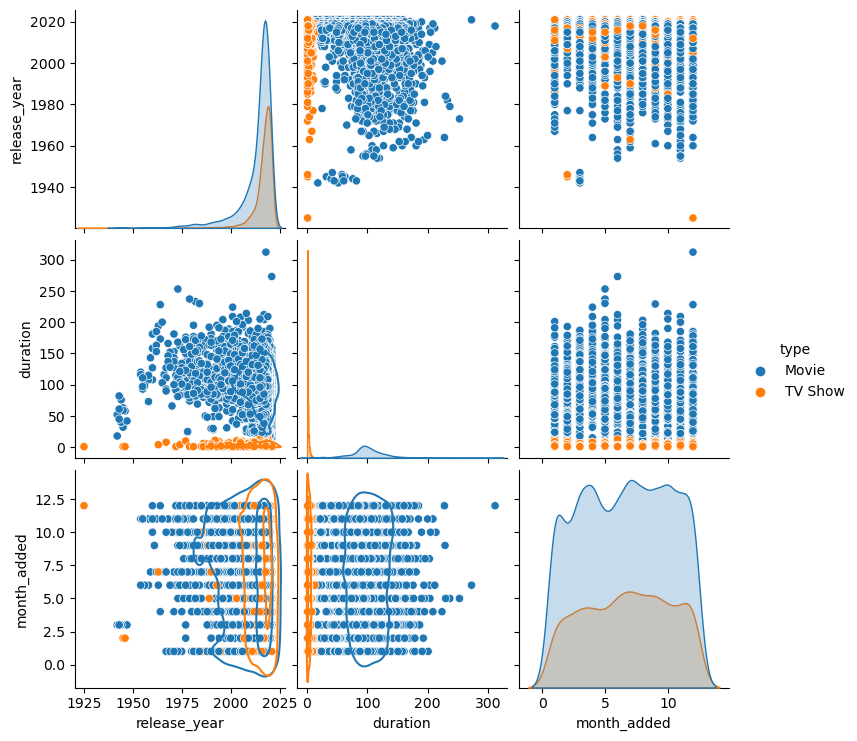

In [44]:
plt.figure(figsize = (25,8))
ax = sns.pairplot(df, hue = 'type')
ax.map_lower(sns.kdeplot, levels=3, color=".2")

/Users/sagarv/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/sagarv/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/sagarv/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/sagarv/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
/Users/sagarv/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 

<Figure size 2500x800 with 0 Axes>

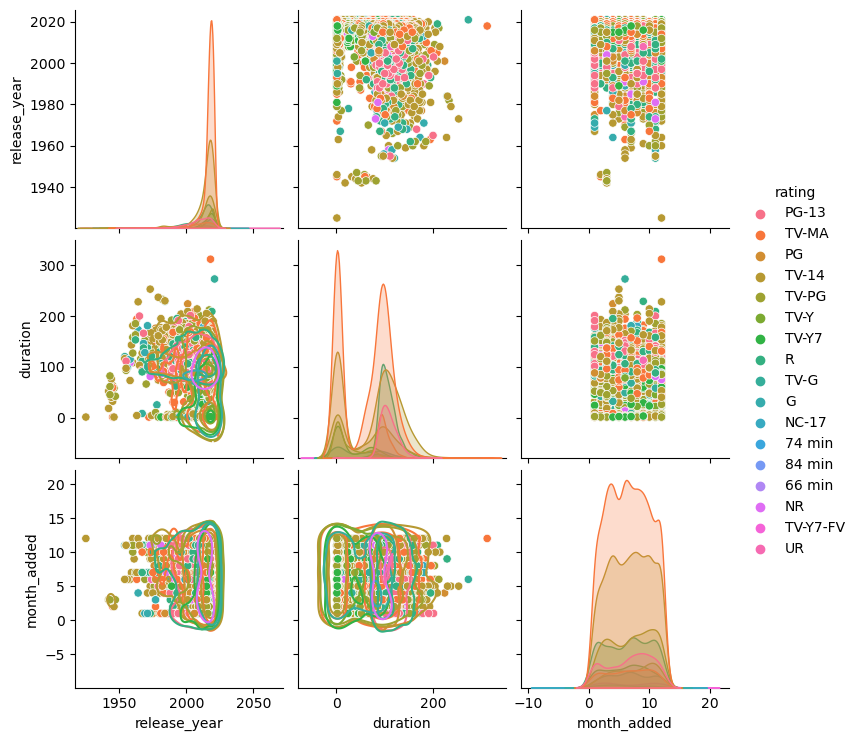

In [45]:
plt.figure(figsize = (25,8))
ax = sns.pairplot(df, hue = 'rating')
ax.map_lower(sns.kdeplot, levels=3, color=".2")

<Figure size 2500x800 with 0 Axes>

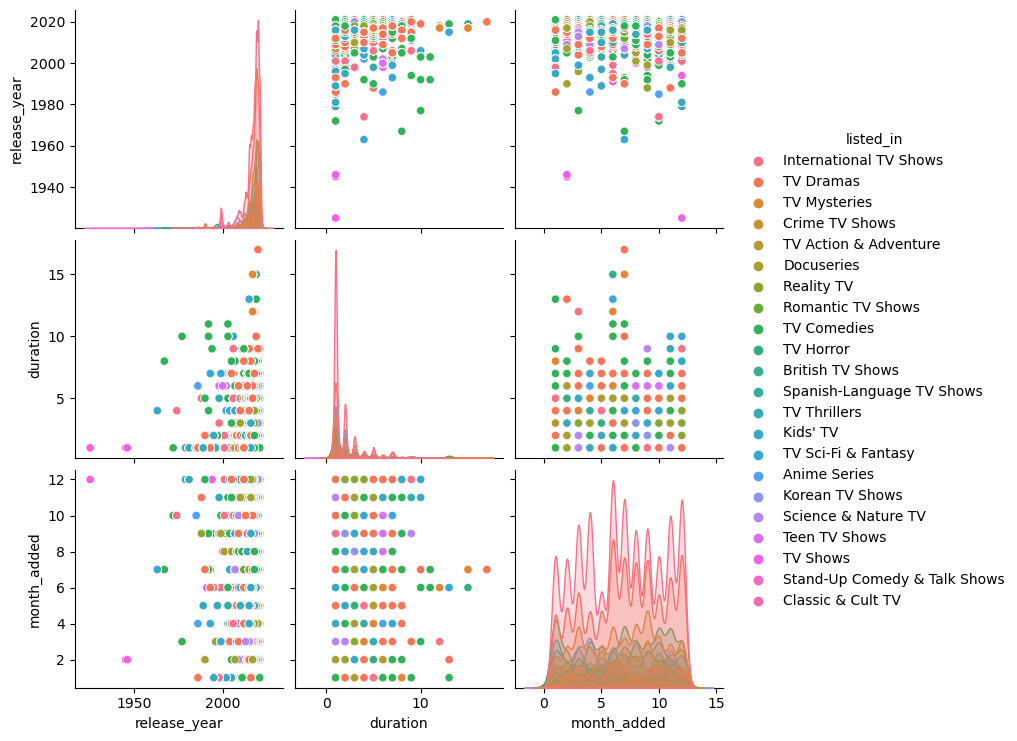

In [46]:
snsDF = cast_listedIn[cast_listedIn['type'] == 'TV Show']
plt.figure(figsize = (25,8))
ax = sns.pairplot(snsDF, hue = 'listed_in')



---



---



---



## Insights